# **Big Data Project-Group 85 : Cardiovascular Diseases Risk Prediction Dataset**

1. Hardik Jain
2. Manas Pattabhiramaiah Shankar
3. Samarth Chandravat








### **Problem Statement:**
Heart disease is a major global health concern, claiming millions of lives and putting a tremendous strain on healthcare systems. Early detection and accurate prediction of heart disease are critical in controlling and avoiding the illness's beginnings, as well as improving patient outcomes. Advances in medical research, technology, and data analysis have considerably improved our understanding of cardiac disease prediction throughout the years. This brief overview seeks to provide an overview of the progress made in this subject, highlighting significant methodology and approaches used in heart disease prediction. We can obtain significant insights into the shifting landscape of heart disease prediction by investigating numerous risk factors, diagnostic techniques, and future trends, opening the way for more proactive and personalised treatment solutions.

### **Project Notebook Overview :**


1.   Dataset Information and Data Preprocessing
2.   Exploratory Data Analysis (EDA)
3.   Feature Engineering
4.   Modelling
5.   Conclusion

### **Import the Necessary Libraries:**


In [ ]:
!pip install pandasql
!pip install sqlalchemy==1.4.46

In [ ]:
import numpy as np
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

#### **Importing and loading the Dataset :**

link to dataset : https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
!!kaggle datasets download -d alphiree/cardiovascular-diseases-risk-prediction-dataset

['cardiovascular-diseases-risk-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)']

In [ ]:
!unzip /content/cardiovascular-diseases-risk-prediction-dataset.zip

Archive:  /content/cardiovascular-diseases-risk-prediction-dataset.zip
replace CVD_cleaned.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: CVD_cleaned.csv         


### Here, we are saving the dataset which we imported from kaggle into a dataframe called 'health_df'.

In [ ]:
health_df = pd.read_csv("./CVD_cleaned.csv")
health_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


# **Dataset Information and Data Preprocessing**

In [ ]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
health_df.shape

(308854, 19)

In [ ]:
health_df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

### We found that there are no 'NULL' values ion the dataset and hence there is no need to drop the 'NULL' values. We will now check if we have any duplicated data in the dataset:

In [ ]:
health_df.duplicated().sum()

80

In [ ]:
health_df=health_df.drop_duplicates()
health_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


### We found that about 80 rows in the dataset had duplicated data, so after dropping those rows we are left with 308774 rows and 19 columns in the dataset, which we will use for further analysis.

In [ ]:
health_df.shape

(308774, 19)

In [ ]:
health_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308774.0,170.615220,10.658452,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308774.0,83.590399,21.344664,24.95,68.04,81.65,95.25,293.02
BMI,308774.0,28.626813,6.522810,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308774.0,5.097557,8.200434,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308774.0,29.834290,24.877812,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308774.0,15.109517,14.926912,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308774.0,6.297237,8.583837,0.00,2.00,4.00,8.00,128.00


### In this section, we check how many unique values are there in each column and print these unique values to get more idea about the dataset.

In [ ]:
health_df.select_dtypes(include='object').nunique()

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

In [ ]:
for col in health_df.select_dtypes(include = "object"):
    print(f"Column name: {col}")
    print(health_df[col].unique())
    print('\n', '-'*80, '\n')

Column name: General_Health
['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']

 -------------------------------------------------------------------------------- 

Column name: Checkup
['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']

 -------------------------------------------------------------------------------- 

Column name: Exercise
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Heart_Disease
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Skin_Cancer
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Other_Cancer
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Depression
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name:

# **Exploratory Data Analysis**
## 1. Univariate Analysis
### Here, we first start with our Exploratory Data Analysis(EDA) part by performing a univariate analysis, where we check the count of each unique value in column in the dataset for each of the columns by plotting a bar plot with the count on the y-axis and the value on the x-axis.

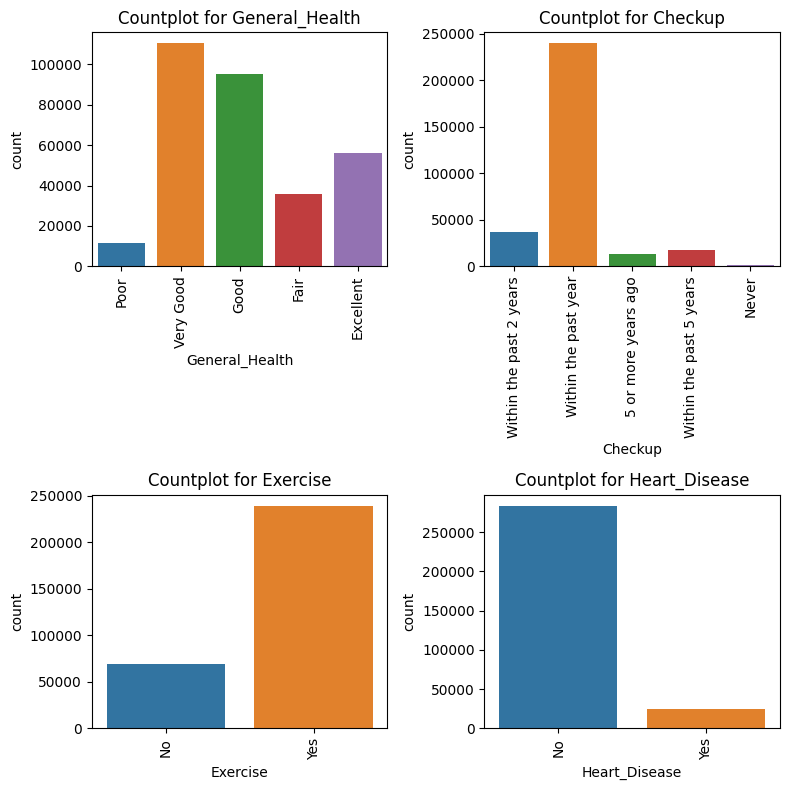

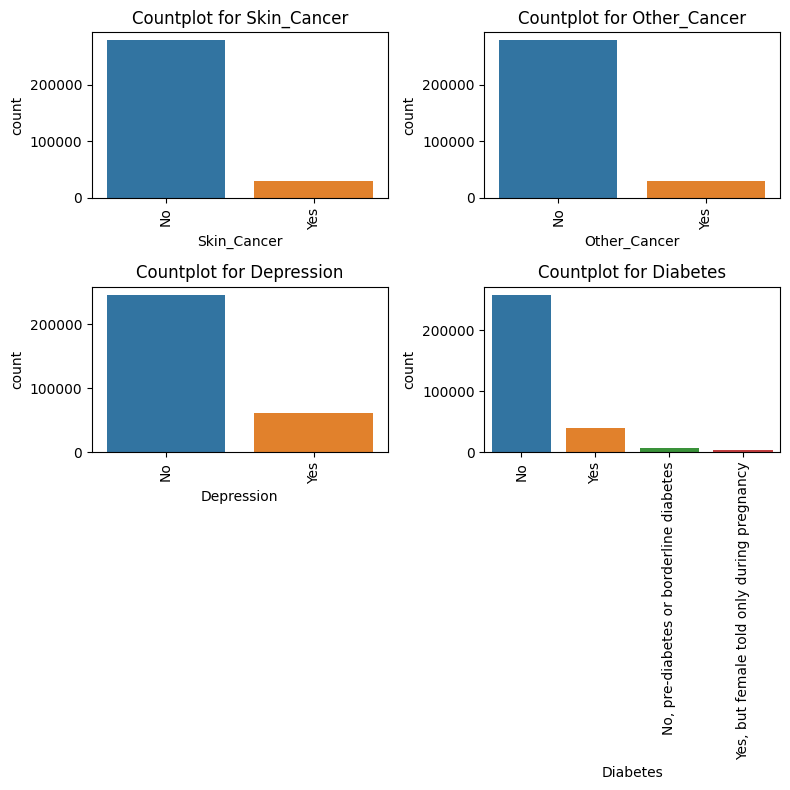

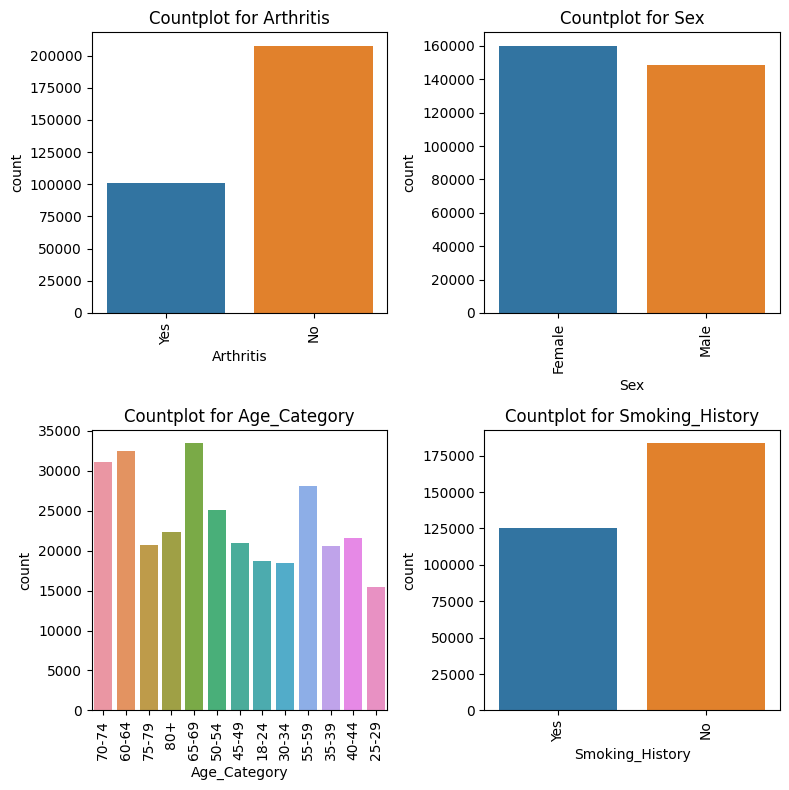

In [ ]:

columns_to_exclude = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
columns_to_plot = [col for col in health_df.columns if col not in columns_to_exclude]
for i in range(0, len(columns_to_plot), 4):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
    axes = axes.flatten()
    current_columns = columns_to_plot[i:i+4]
    for j, column in enumerate(current_columns):
        sns.countplot(data=health_df, x=column, ax=axes[j])
        axes[j].set_title('Countplot for ' + column)
        axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.show()


## 2. Bivariate Analysis
Bivariate analysis is a crucial component of understanding the relationships between different variables in a dataset. In this specific analysis, we are exploring the connection between various disease conditions and a set of selected variables. The chosen variables include 'General_Health,' 'Exercise,' 'Sex,' 'Age_Category,' and 'Smoking_History,' while the target diseases under investigation are 'Heart_Disease,' 'Skin_Cancer,' 'Other_Cancer,' 'Diabetes,' and 'Arthritis.'

Let's break down the bivariate analysis and its implications for each combination of disease condition and selected variable:

**General Health and Disease Conditions:**

The first analysis considers the relationship between general health and each disease condition. This provides insights into whether individuals with different disease conditions tend to report varying levels of general health.

**Exercise Habits and Disease Conditions:**

The second analysis explores how exercise habits relate to each disease condition. Understanding whether there is a correlation between exercise and specific diseases can have important implications for preventive healthcare strategies.

**Gender (Sex) and Disease Conditions:**

Investigating the distribution of disease conditions across different genders can reveal potential gender-specific health patterns. This analysis can highlight whether certain diseases are more prevalent in one gender compared to the other.

**Age Categories and Disease Conditions:**

The third analysis delves into the impact of age on the occurrence of each disease condition. By categorizing individuals into age groups, you can identify whether certain diseases are more likely to affect specific age demographics.

**Smoking History and Disease Conditions:**

Lastly, the analysis examines the association between smoking history and each disease condition. This is particularly significant as smoking is a well-established risk factor for various health issues, and this analysis can confirm its impact on the selected diseases.

For each combination of disease and variable, a countplot is generated, providing a visual representation of the distribution of the variables concerning the presence or absence of the disease.

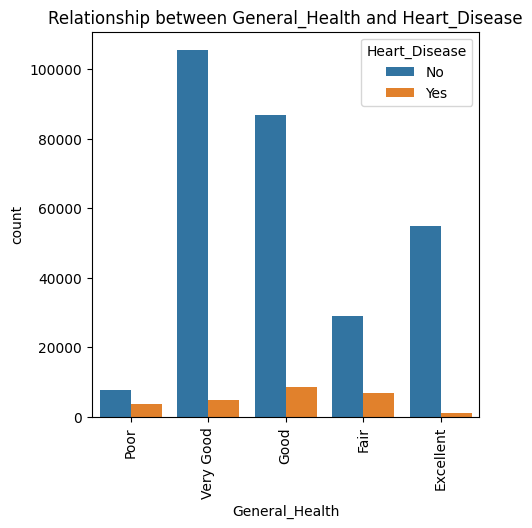

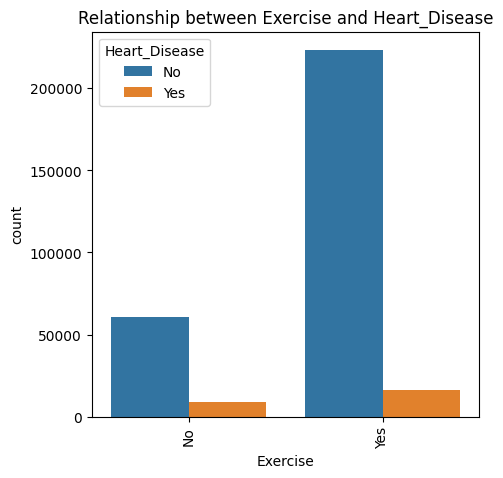

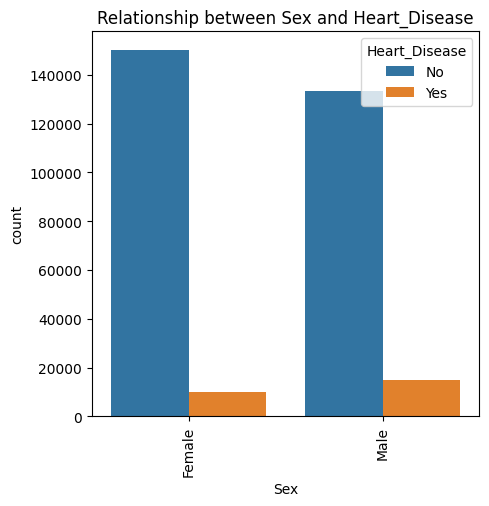

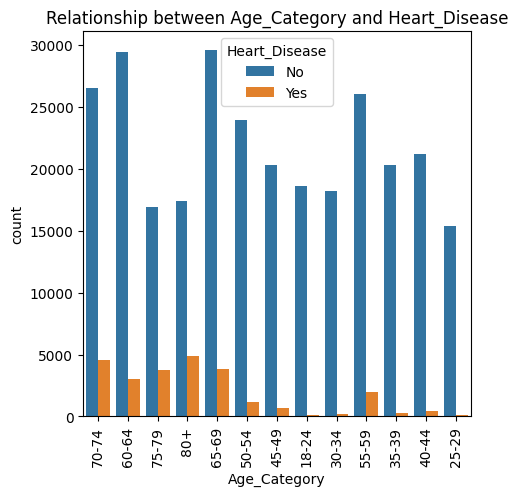

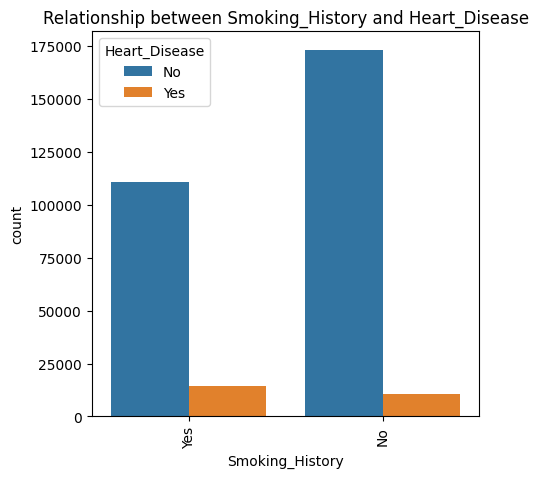

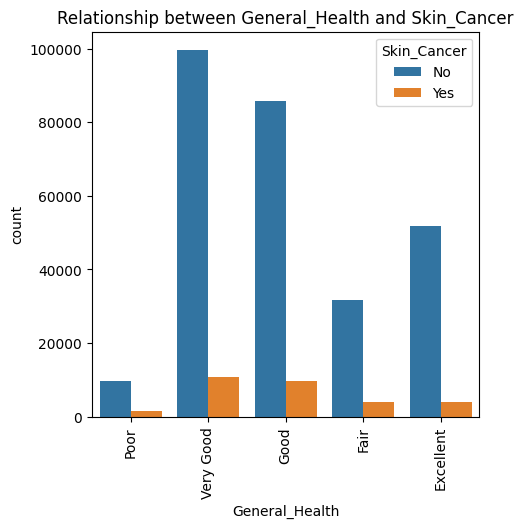

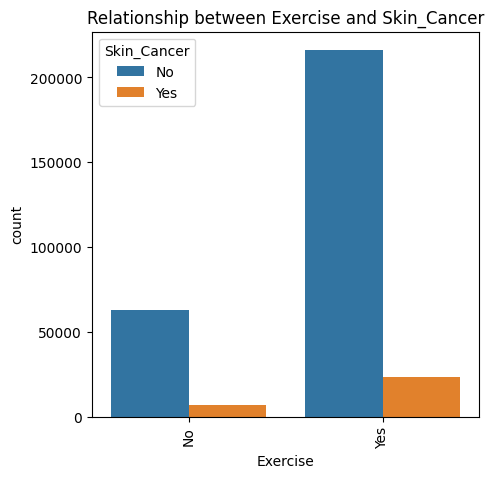

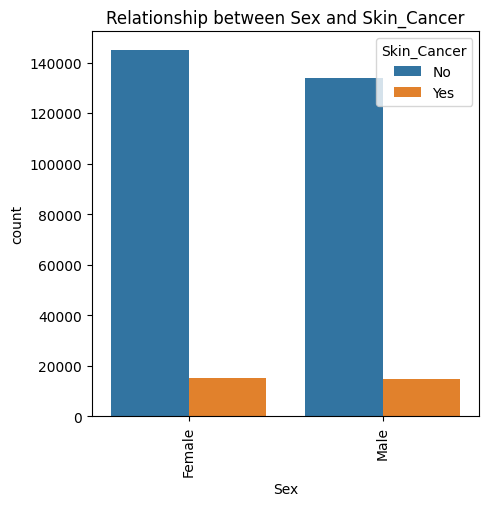

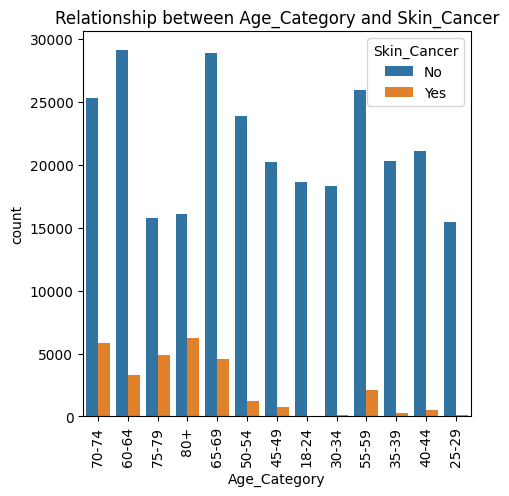

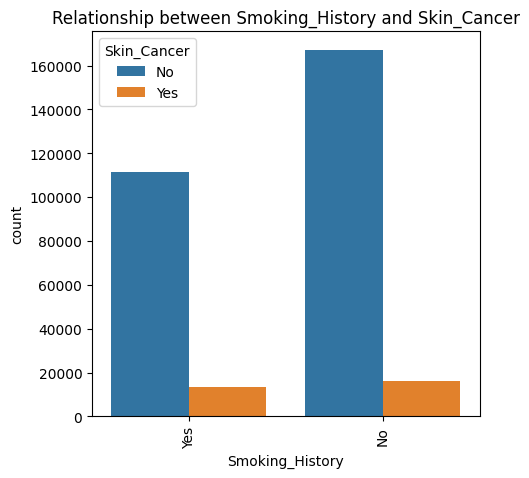

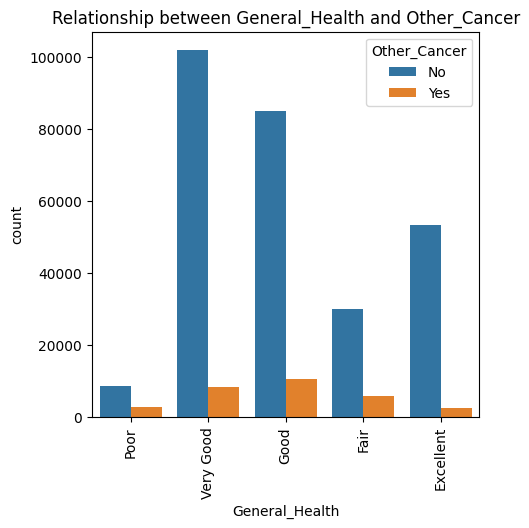

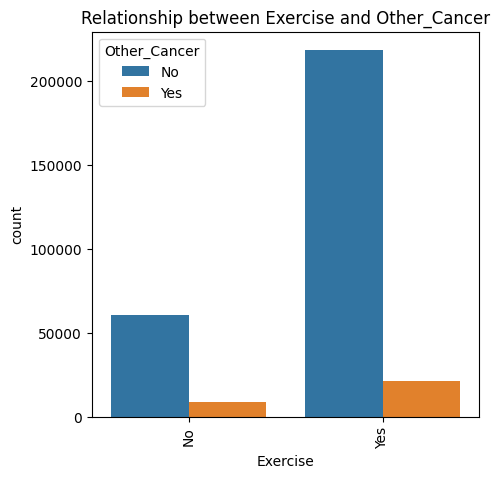

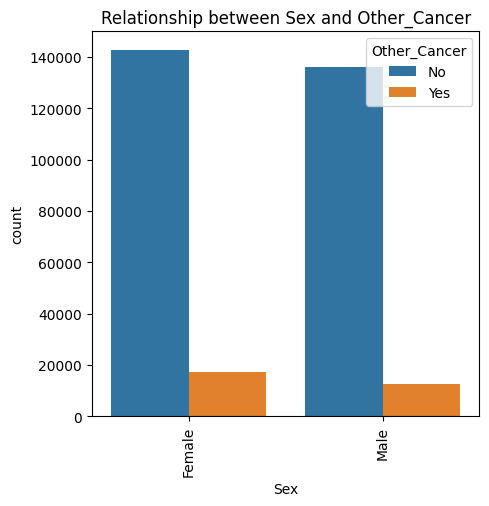

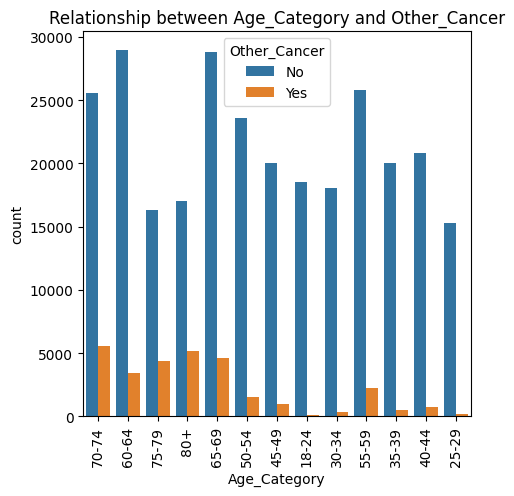

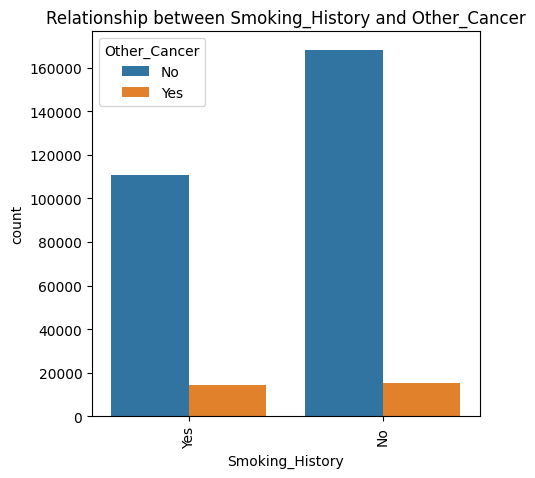

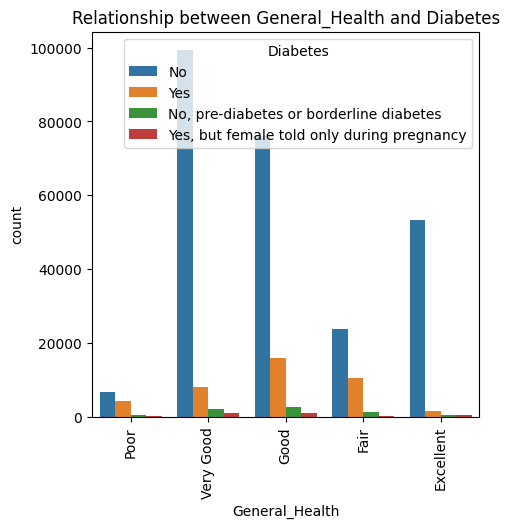

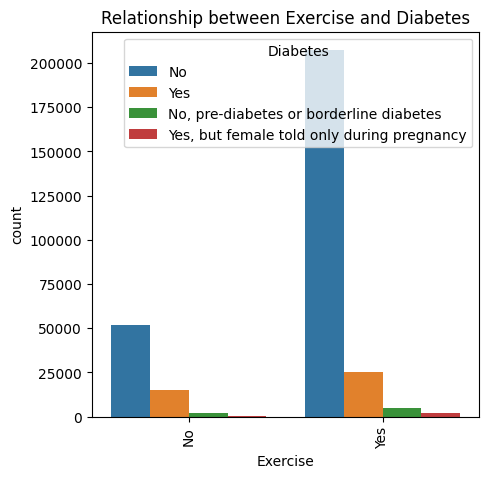

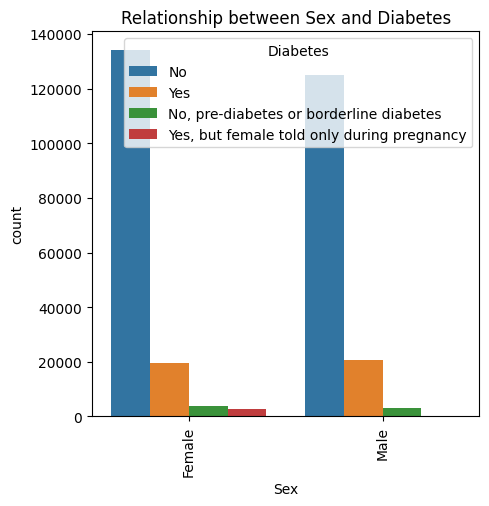

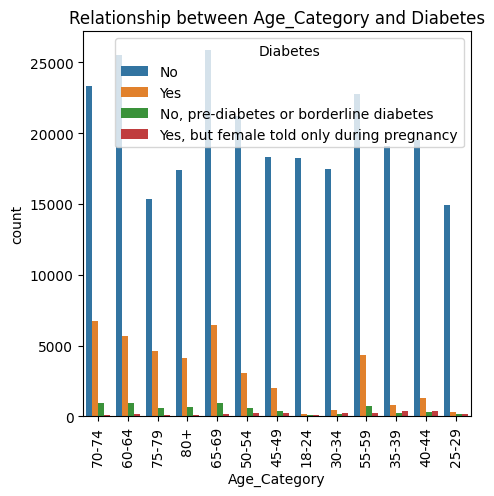

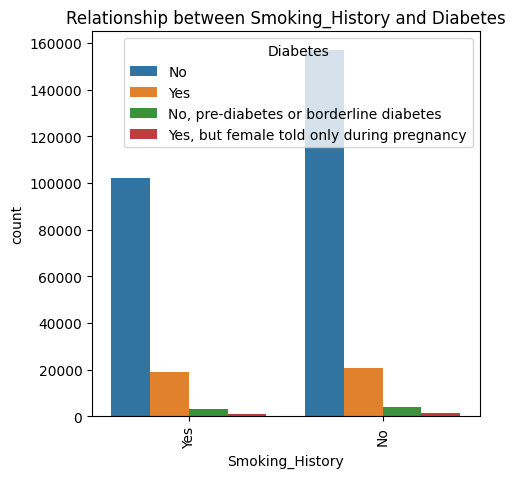

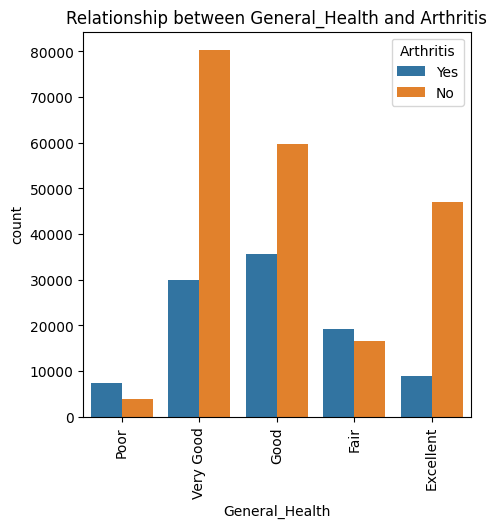

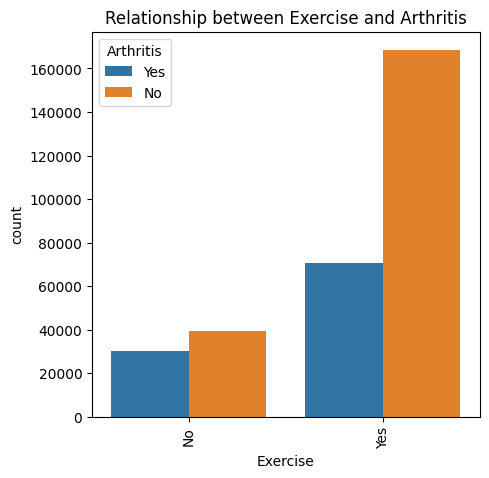

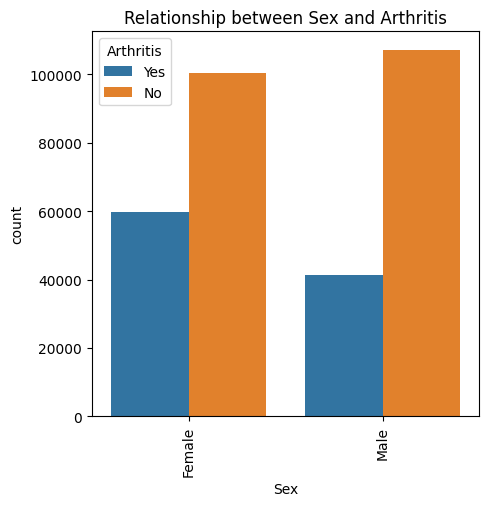

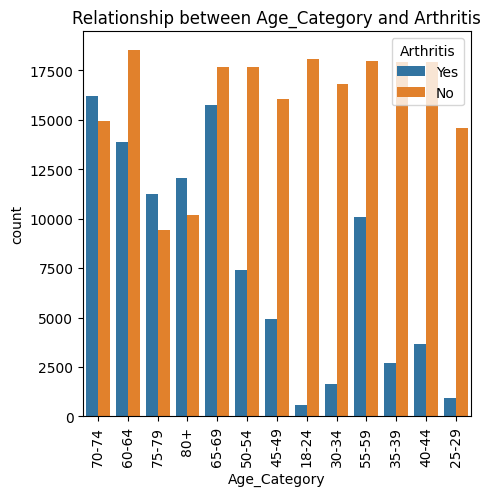

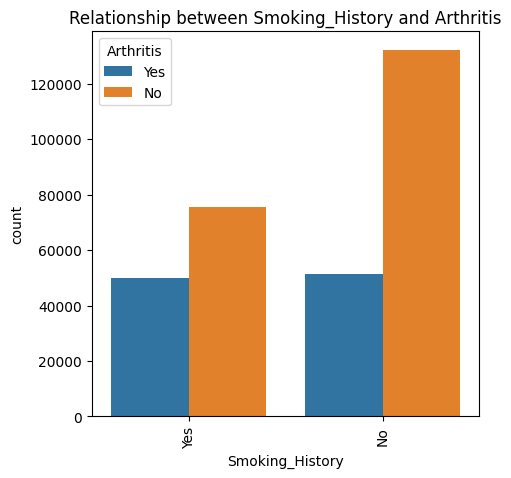

In [ ]:
# Bivariate Analysis

# Here we are analyzing the relation between disease conditions and some selected variables.
selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']
disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']


for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(5, 5))
        sns.countplot(data=health_df, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=90)
        plt.show()

        print('\n' * 2)

## 3. Correlation Matrix

The correlation matrix is a table that displays the correlation coefficients between many variables. Each cell in the table represents the correlation between two variables, and the values range from -1 to 1.

 In order to calculate the correlation matrix for the entire DataFrame, we encode the categorical variables into numerical values. We utilize the LabelEncoder class from scikit-learn to transform categorical variables in the DataFrame into numerical format. The loop iterates through columns with object data type (presumably containing categorical variables), and the fit_transform method is applied to encode these variables with numerical labels.

 The correlation coefficient quantifies the strength and direction of a linear relationship between two variables. For our dataset, we would be better able to visualize which columns are more correlated with each other and also check which columns are more correlated with the 'heart disease' column in order to better choose the features for analysis.

In [ ]:
df_encoded = health_df.copy()
label_encoder = LabelEncoder()
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
df_encoded.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


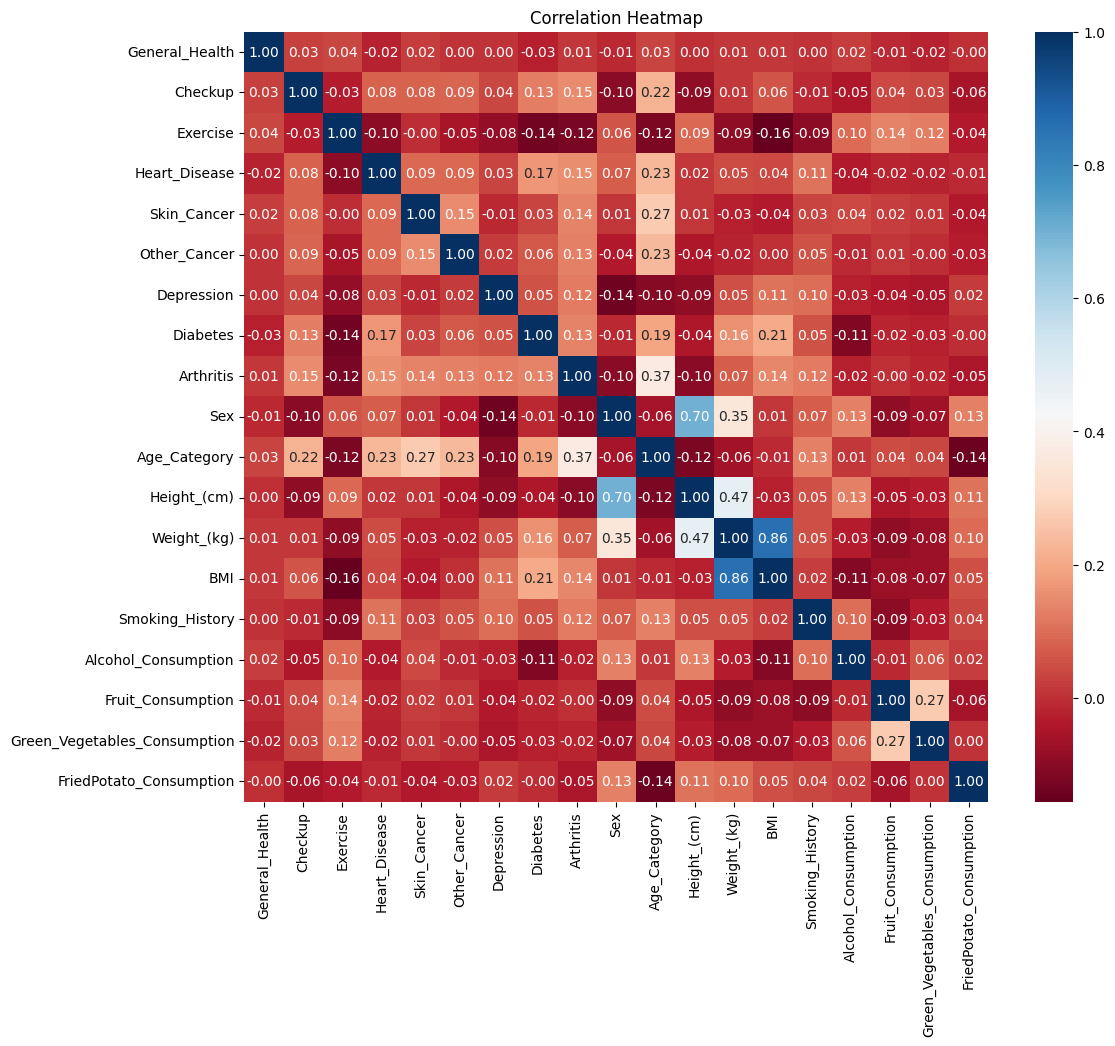

In [ ]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
co_mat = df_encoded.corr()['Heart_Disease']
co_mat

General_Health                 -0.020640
Checkup                         0.083513
Exercise                       -0.096321
Heart_Disease                   1.000000
Skin_Cancer                     0.090835
Other_Cancer                    0.092369
Depression                      0.032494
Diabetes                        0.166218
Arthritis                       0.153891
Sex                             0.072606
Age_Category                    0.229027
Height_(cm)                     0.015783
Weight_(kg)                     0.045854
BMI                             0.042642
Smoking_History                 0.107757
Alcohol_Consumption            -0.036614
Fruit_Consumption              -0.020045
Green_Vegetables_Consumption   -0.024027
FriedPotato_Consumption        -0.009249
Name: Heart_Disease, dtype: float64

## **Having analyzed univariate and bivariate relations and also generating the correlation matrix, let's shift the focus of EDA on Heart Disease**

We first transforming specific columns in a DataFrame, denoted by the variable health_df, by replacing categorical values ('Yes' and 'No') with numerical values (1 and 0). This type of transformation is common when dealing with binary or categorical data that can be effectively represented as binary values.

In [ ]:
binary_cols = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Smoking_History','Exercise']
heart_df = health_df.copy();
heart_df[binary_cols] = heart_df[binary_cols].replace({'Yes': 1, 'No': 0})
heart_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,Female,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0,1,0,0,0,1,0,Female,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,1,0,0,0,0,1,0,Female,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,1,1,0,0,0,1,0,Male,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,Within the past year,0,0,0,0,0,0,0,Male,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


Here, We convert the ordinal categorical values in the 'Checkup' column to their corresponding integer representations, making it easier to incorporate this variable into numerical analyses and further in machine learning models.

In [ ]:
checkup_mapping = {
    'Never': 0,
    'Within the past 5 years': 5,
    'Within the past 2 years': 2,
    'Within the past year': 1,
    '5 or more years ago': 6,
}

heart_df['Checkup'] = heart_df['Checkup'].map(checkup_mapping)
heart_df['Checkup'].unique()

array([2, 1, 6, 5, 0])

Here, we convert the categorical values in the 'Sex' column to their corresponding integer representations, creating a binary encoding where 'Female' is represented by 0 and 'Male' by 1.

In [ ]:
Sex_Int= {
    'Female': 0,
    'Male': 1,
}


heart_df['Sex'] = heart_df['Sex'].map(Sex_Int)

heart_df['Sex'].unique()

array([0, 1])

#### Here, We visualize the data again, after making the above changes

In [ ]:
heart_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,2,0,0,0,0,0,0,1,0,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,1,0,1,0,0,0,1,0,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,1,1,0,0,0,0,1,0,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,1,1,1,0,0,0,1,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,1,0,0,0,0,0,0,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [ ]:
heart_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Checkup,308774.0,1.559215,1.342651,0.00,1.00,1.00,1.00,6.00
Exercise,308774.0,0.775017,0.417572,0.00,1.00,1.00,1.00,1.00
Heart_Disease,308774.0,0.080871,0.272638,0.00,0.00,0.00,0.00,1.00
Skin_Cancer,308774.0,0.097133,0.296139,0.00,0.00,0.00,0.00,1.00
Other_Cancer,308774.0,0.096760,0.295631,0.00,0.00,0.00,0.00,1.00
Depression,308774.0,0.200467,0.400350,0.00,0.00,0.00,0.00,1.00
Arthritis,308774.0,0.327304,0.469230,0.00,0.00,0.00,1.00,1.00
Sex,308774.0,0.481320,0.499652,0.00,0.00,0.00,1.00,1.00
Height_(cm),308774.0,170.615220,10.658452,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308774.0,83.590399,21.344664,24.95,68.04,81.65,95.25,293.02


## 4) Distribution of Heart Disease Patients based on General Health Rating!
Here, we generate a countplot for visualizing the distribution of heart disease patients based on different general health ratings. The x-axis represents the general health ratings, while the count of individuals is depicted on the y-axis.


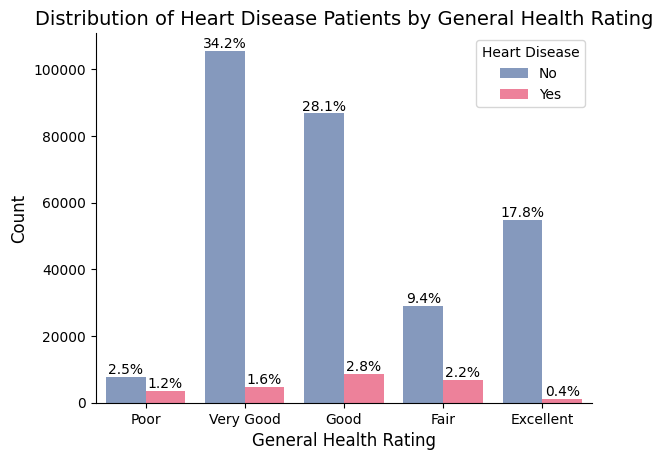

In [ ]:
colors = ["#7C96C6", "#FF6F91"]

# Plotting the distribution of heart disease patients based on general health ratings
ax = sns.countplot(data=heart_df, x='General_Health', hue='Heart_Disease', palette=colors)

plt.xlabel('General Health Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Heart Disease Patients by General Health Rating', fontsize=14)
plt.legend(title='Heart Disease', labels=['No', 'Yes'], loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

total = len(heart_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

sns.despine()
plt.show()

We find that among the people who report excellent general health rating, the number of people who have heart disease is significantly less in comparison to the number of people who don't have a heart disease. This comparative number or proportion increases as we go from 'Excellent' health rating to 'poor' health rating.

## 5) Checking gender and their average BMI based on heart disease and also visualizing the correlation between Weight and BMI


Findings: Individuals with heart disease, regardless of gender, exhibit higher average BMI compared to those without heart disease, suggesting a correlation between elevated BMI and the presence of cardiovascular issues in both males and females.

In [ ]:
query = """
    SELECT Sex, Heart_Disease, AVG(BMI) AS BMI
    FROM health_df
    GROUP BY Sex, Heart_Disease
"""

grouped_data = ps.sqldf(query, locals())
fig = px.bar(grouped_data, x='Sex', y='BMI', color='Heart_Disease', color_discrete_sequence=colors, barmode='group', title="Checking gender and their average BMI based on heart disease?")
fig.update_layout(
    xaxis_title="Gender", yaxis_title="Average BMI", legend_title="Heart Disease",
    xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='white',
    width=800, height=600
)
fig.show()

Here, we have calculated the Pearson correlation coefficient between weight and BMI using scipy.stats.pearsonr. We have also printed the correlation coefficient to quantify the strength and direction of the linear relationship.Finally, we created a scatter plot using Seaborn (sns.scatterplot) to visually represent the distribution of BMI with respect to weight. We find that there is a linear relationship between weight and BMI.

Pearson correlation coefficient: 0.86


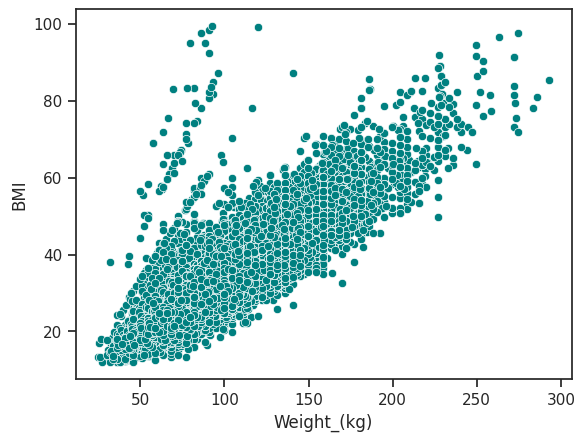

In [ ]:
from scipy.stats.stats import pearsonr

x1 = health_df['Weight_(kg)']
y1 = health_df['BMI']

sns.set(style='ticks')
sns.scatterplot(x=x1, y=y1, color='teal')

plt.xlabel('Weight_(kg)')
plt.ylabel('BMI')

correlation_coefficient, p_value = pearsonr(x1, y1)
print(f"Pearson correlation coefficient: {correlation_coefficient:.2f}")

plt.show()

## 6) Distribution of Heart Disease Patients based on Exercise Habits

Findings: Heart disease is less prevalent among individuals with exercise habits, with a rate of 6.7%, contrasting with a higher occurrence of 13% in those who avoid regular exercise, highlighting the significant impact of exercise habits on the distribution of heart disease patients.
**NOTE: We have used PandasSQL in all sections for comparing Distribution of Heart Disease Patients based on different diseases/habits.**

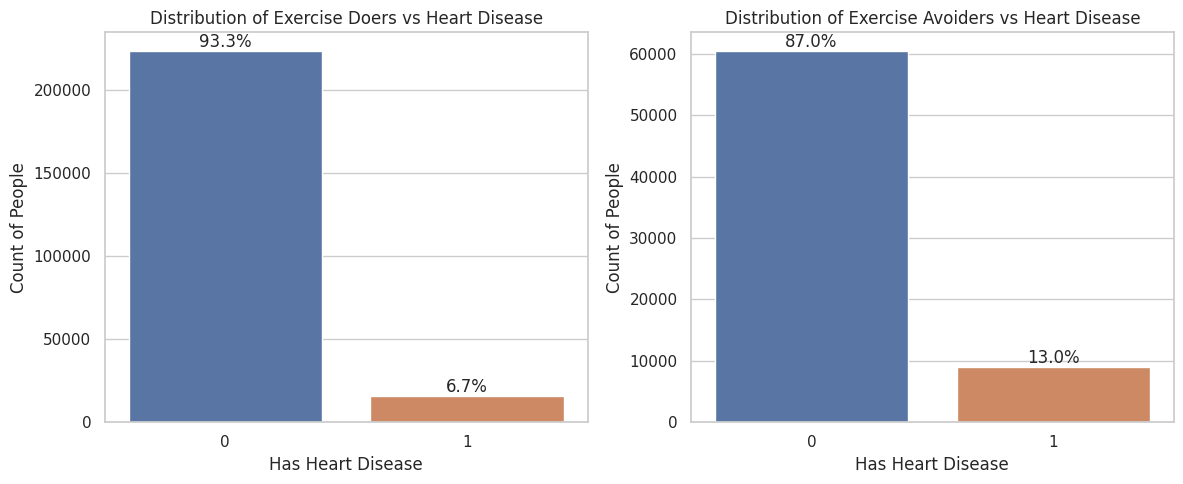

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


query = """
    SELECT *
    FROM heart_df
    WHERE Exercise = 1
"""
exercise_doers = ps.sqldf(query, locals())

# Filter the data for exercise doers
heart_disease_counts_doers = exercise_doers['Heart_Disease'].value_counts()
exercise_doer_bar = sns.barplot(x=heart_disease_counts_doers.index, y=heart_disease_counts_doers.values, ax=axes[0])
total_doers = len(exercise_doers)
for p in exercise_doer_bar.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_doers)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    exercise_doer_bar.annotate(percentage, (x, y), ha='center', va='bottom')
axes[0].set_xlabel('Has Heart Disease')
axes[0].set_ylabel('Count of People')
axes[0].set_title('Distribution of Exercise Doers vs Heart Disease')


query = """
    SELECT *
    FROM heart_df
    WHERE Exercise = 0
"""
exercise_avoiders = ps.sqldf(query, locals())


heart_disease_counts_avoiders = exercise_avoiders['Heart_Disease'].value_counts()
exercise_avoider_bar = sns.barplot(x=heart_disease_counts_avoiders.index, y=heart_disease_counts_avoiders.values, ax=axes[1])
total_avoiders = len(exercise_avoiders)
for p in exercise_avoider_bar.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_avoiders)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    exercise_avoider_bar.annotate(percentage, (x, y), ha='center', va='bottom')
axes[1].set_xlabel('Has Heart Disease')
axes[1].set_ylabel('Count of People')
axes[1].set_title('Distribution of Exercise Avoiders vs Heart Disease')


plt.tight_layout()


plt.show()

## 7) Distribution of Heart Disease Patients based on Diabetes

Findings: A strong correlation emerges between diabetes and heart disease, revealing a higher prevalence of 20.9% among patients with diabetes compared to 6.1% in those without diabetes, underscoring the notable impact of diabetes on the distribution of heart disease patients.

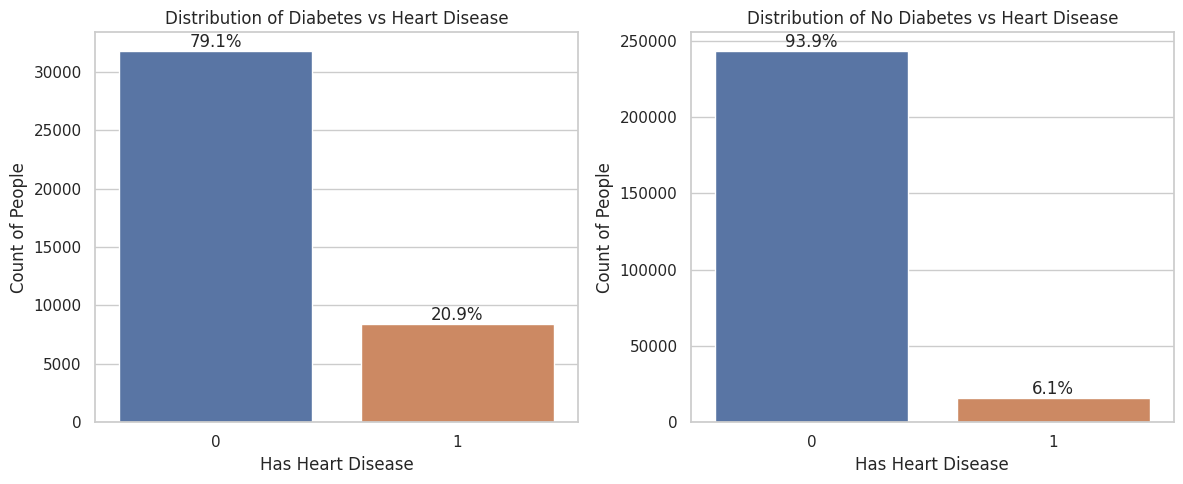

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

query = """
    SELECT *
    FROM heart_df
    WHERE Diabetes = 1
"""
has_diabetes = ps.sqldf(query, locals())

# Filter the data for diabetes patients
heart_disease_and_diabetes = has_diabetes['Heart_Disease'].value_counts()
diabetes_bar = sns.barplot(x=heart_disease_and_diabetes.index, y=heart_disease_and_diabetes.values, ax=axes[0])
total_diabetes = len(has_diabetes)
for p in diabetes_bar.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_diabetes)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    diabetes_bar.annotate(percentage, (x, y), ha='center', va='bottom')
axes[0].set_xlabel('Has Heart Disease')
axes[0].set_ylabel('Count of People')
axes[0].set_title('Distribution of Diabetes vs Heart Disease')

# Filter the data for non-diabetes patients
query = """
    SELECT *
    FROM heart_df
    WHERE Diabetes = 0
"""
has_no_diabetes = ps.sqldf(query, locals())

heart_disease_and_no_diabetes = has_no_diabetes['Heart_Disease'].value_counts()
no_diabetes_bar = sns.barplot(x=heart_disease_and_no_diabetes.index, y=heart_disease_and_no_diabetes.values, ax=axes[1])
total_no_diabetes = len(has_no_diabetes)
for p in no_diabetes_bar.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_no_diabetes)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    no_diabetes_bar.annotate(percentage, (x, y), ha='center', va='bottom')
axes[1].set_xlabel('Has Heart Disease')
axes[1].set_ylabel('Count of People')
axes[1].set_title('Distribution of No Diabetes vs Heart Disease')


plt.tight_layout()


plt.show()


## 8) Distribution of Heart Disease Patients based on Arthritis

A substantial correlation is observed between arthritis and heart disease, as patients with arthritis exhibit a higher heart disease rate of 14.1%, contrasting with a lower rate of 5.2% in those without arthritis, emphasizing the significant association between arthritis and the distribution of heart disease patients.

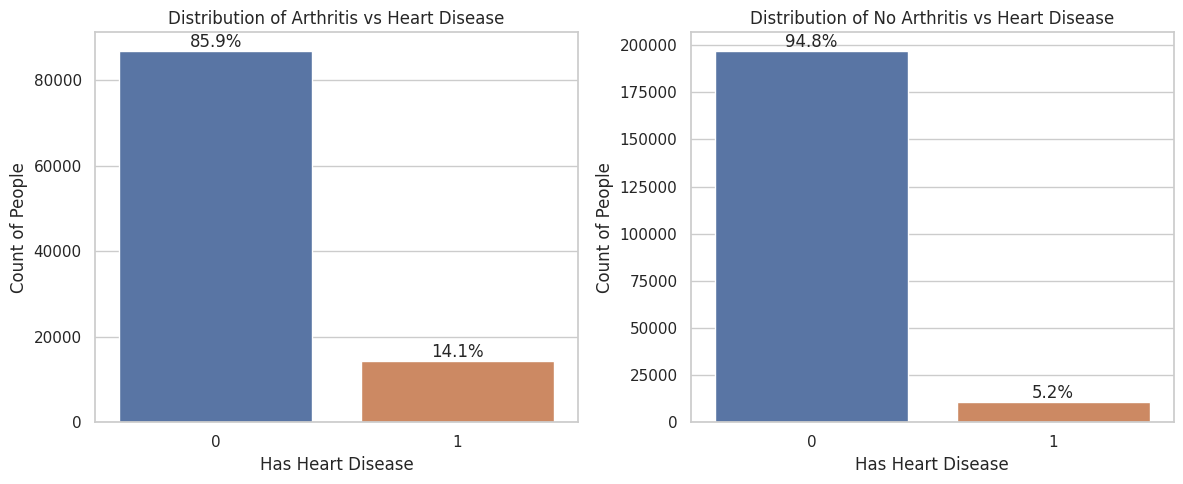

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

query = """
    SELECT *
    FROM heart_df
    WHERE Arthritis = 1
"""
has_arthritis = ps.sqldf(query, locals())

# Filter the data for arthritis-afflicted patients
heart_disease_and_arthritis = has_arthritis['Heart_Disease'].value_counts()
arthritis_bar = sns.barplot(x=heart_disease_and_arthritis.index, y=heart_disease_and_arthritis.values, ax=axes[0])
total_arthritis = len(has_arthritis)
for p in arthritis_bar.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_arthritis)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    arthritis_bar.annotate(percentage, (x, y), ha='center', va='bottom')
axes[0].set_xlabel('Has Heart Disease')
axes[0].set_ylabel('Count of People')
axes[0].set_title('Distribution of Arthritis vs Heart Disease')
# Filter the data for non-arthritis patients
query = """
    SELECT *
    FROM heart_df
    WHERE Arthritis = 0
"""
has_no_arthritis = ps.sqldf(query, locals())

heart_disease_and_no_arthritis = has_no_arthritis['Heart_Disease'].value_counts()
no_arthritis_bar = sns.barplot(x=heart_disease_and_no_arthritis.index, y=heart_disease_and_no_arthritis.values, ax=axes[1])
total_no_arthritis = len(has_no_arthritis)
for p in no_arthritis_bar.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_no_arthritis)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    no_arthritis_bar.annotate(percentage, (x, y), ha='center', va='bottom')
axes[1].set_xlabel('Has Heart Disease')
axes[1].set_ylabel('Count of People')
axes[1].set_title('Distribution of No Arthritis vs Heart Disease')


plt.tight_layout()


plt.show()

## 9) Distribution of Heart Disease Patients based on Skin Cancer

Findings: A notable correlation is evident between skin cancer and heart disease, with patients having skin cancer showing a higher heart disease rate of 15.6%, compared to a lower rate of 7.3% in those without skin cancer. This emphasizes a potential association between skin cancer and the distribution of heart disease patients.

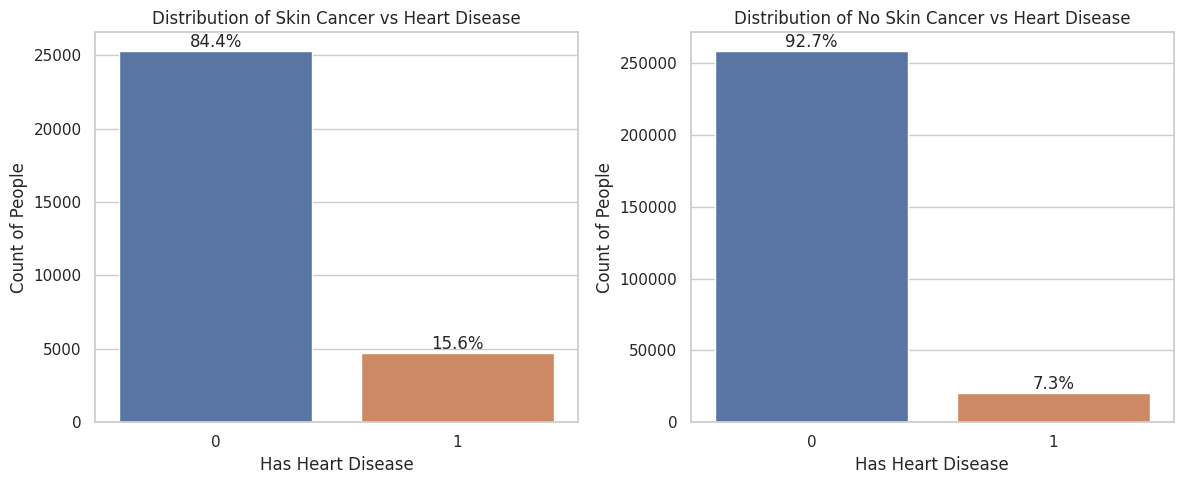

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

query = """
    SELECT *
    FROM heart_df
    WHERE Skin_Cancer = 1
"""
has_skin_cancer = ps.sqldf(query, locals())

# Filter the data for skin cancer patients
heart_disease_and_skin_cancer = has_skin_cancer['Heart_Disease'].value_counts()
skin_cancer_bar = sns.barplot(x=heart_disease_and_skin_cancer.index, y=heart_disease_and_skin_cancer.values, ax=axes[0])
total = len(has_skin_cancer)
for p in skin_cancer_bar.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    skin_cancer_bar.annotate(percentage, (x, y), ha='center', va='bottom')
axes[0].set_xlabel('Has Heart Disease')
axes[0].set_ylabel('Count of People')
axes[0].set_title('Distribution of Skin Cancer vs Heart Disease')


# Filter the data for non-skin cancer patients
query = """
    SELECT *
    FROM heart_df
    WHERE Skin_Cancer = 0
"""
has_no_skin_cancer = ps.sqldf(query, locals())

heart_disease_and_no_skin_cancer = has_no_skin_cancer['Heart_Disease'].value_counts()
no_skin_cancer_bar = sns.barplot(x=heart_disease_and_no_skin_cancer.index, y=heart_disease_and_no_skin_cancer.values, ax=axes[1])
total_no = len(has_no_skin_cancer)
for p in no_skin_cancer_bar.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_no)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    no_skin_cancer_bar.annotate(percentage, (x, y), ha='center', va='bottom')
axes[1].set_xlabel('Has Heart Disease')
axes[1].set_ylabel('Count of People')
axes[1].set_title('Distribution of No Skin Cancer vs Heart Disease')


plt.tight_layout()


plt.show()

# 10) Distribution of Heart Disease Patients based on Other Cancer

Findings: A significant correlation is observed between other forms of cancer and heart disease, as patients with other cancer types display a higher heart disease rate of 15.8%, in contrast to a lower rate of 7.3% in those without other cancer. This underscores a potential link between other cancer conditions and the distribution of heart disease patients.

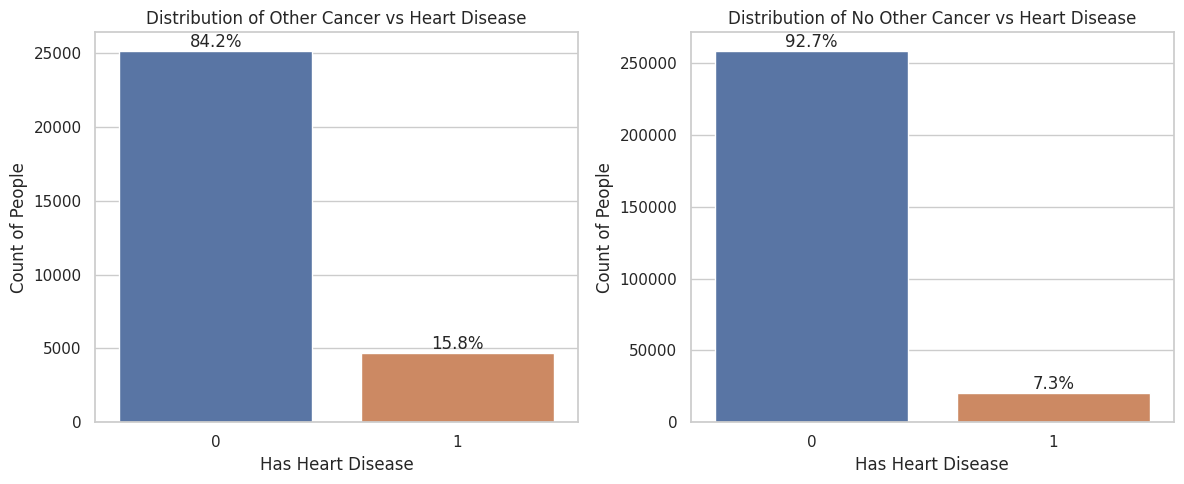

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


query = """
    SELECT *
    FROM heart_df
    WHERE Other_Cancer = 1
"""
has_other_cancer = ps.sqldf(query, locals())

# Filter the data for patients with other types of cancer
heart_disease_and_other_cancer = has_other_cancer['Heart_Disease'].value_counts()
other_cancer_bar = sns.barplot(x=heart_disease_and_other_cancer.index, y=heart_disease_and_other_cancer.values, ax=axes[0])
total_other_cancer = len(has_other_cancer)
for p in other_cancer_bar.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_other_cancer)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    other_cancer_bar.annotate(percentage, (x, y), ha='center', va='bottom')
axes[0].set_xlabel('Has Heart Disease')
axes[0].set_ylabel('Count of People')
axes[0].set_title('Distribution of Other Cancer vs Heart Disease')

# Filter the data for non other cancer type patients
query = """
    SELECT *
    FROM heart_df
    WHERE Other_Cancer = 0
"""
has_no_other_cancer = ps.sqldf(query, locals())

heart_disease_and_no_other_cancer = has_no_other_cancer['Heart_Disease'].value_counts()
no_other_cancer_bar = sns.barplot(x=heart_disease_and_no_other_cancer.index, y=heart_disease_and_no_other_cancer.values, ax=axes[1])
total_no_other_cancer = len(has_no_other_cancer)
for p in no_other_cancer_bar.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_no_other_cancer)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    no_other_cancer_bar.annotate(percentage, (x, y), ha='center', va='bottom')
axes[1].set_xlabel('Has Heart Disease')
axes[1].set_ylabel('Count of People')
axes[1].set_title('Distribution of No Other Cancer vs Heart Disease')


plt.tight_layout()


plt.show()


## 11) Distribution of Heart Disease Patients based on Depression

A modest positive correlation is noted between depression and heart disease, as patients with depression exhibit a slightly higher heart disease rate of 9.9%, compared to a somewhat lower rate of 7.6% in those without depression, suggesting a potential connection between depression and the distribution of heart disease patients.

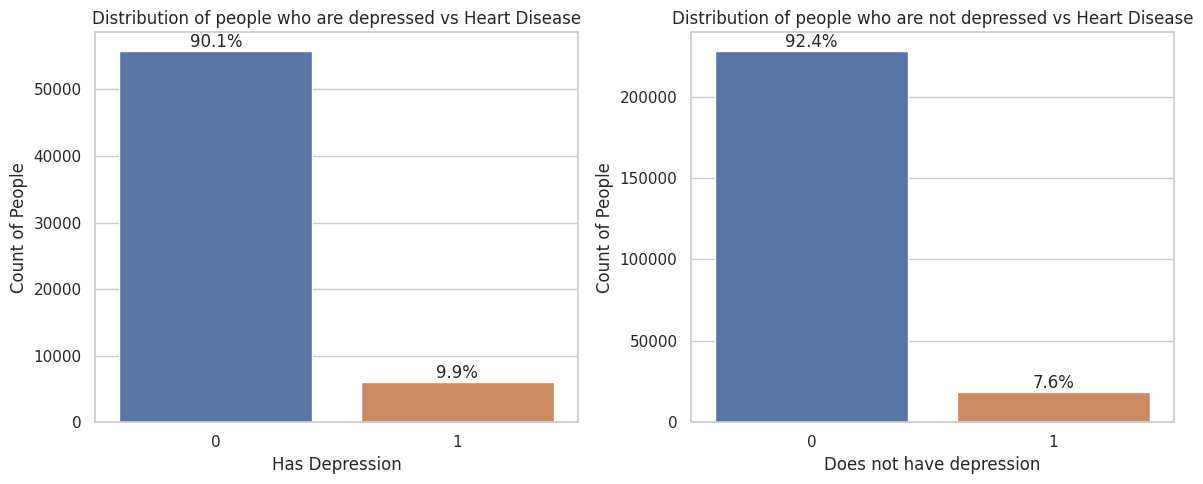

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Filter the data for depressed patients
query = """
    SELECT *
    FROM heart_df
    WHERE Depression = 1
"""
depressed = ps.sqldf(query, locals())

heart_disease_counts_dep = depressed['Heart_Disease'].value_counts()
haveDep = sns.barplot(x=heart_disease_counts_dep.index, y=heart_disease_counts_dep.values, ax=axes[0])
total_dep = len(depressed)
for p in haveDep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_dep)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    haveDep.annotate(percentage, (x, y), ha='center', va='bottom')
axes[0].set_xlabel('Has Depression')
axes[0].set_ylabel('Count of People')
axes[0].set_title('Distribution of people who are depressed vs Heart Disease')

# Filter the data for non-depressed patients
query = """
    SELECT *
    FROM heart_df
    WHERE Depression = 0
"""
not_depressed = ps.sqldf(query, locals())

heart_disease_counts_not_dep = not_depressed['Heart_Disease'].value_counts()
noDep = sns.barplot(x=heart_disease_counts_not_dep.index, y=heart_disease_counts_not_dep.values, ax=axes[1])
total_not_dep = len(not_depressed)
for p in noDep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_not_dep)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    noDep.annotate(percentage, (x, y), ha='center', va='bottom')
axes[1].set_xlabel('Does not have depression')
axes[1].set_ylabel('Count of People')
axes[1].set_title('Distribution of people who are not depressed vs Heart Disease')


plt.tight_layout()


plt.show()


## 12) Variation in Alcohol Consumption among Heart Disease Patients

Findings: A negative correlation is evident in alcohol consumption among heart disease patients, with a higher rate of 10.6% for those avoiding alcohol, contrasting with a lower rate of 7.2% for those who consume alcohol. This highlights a potential inverse relationship between alcohol consumption and the prevalence of heart disease.

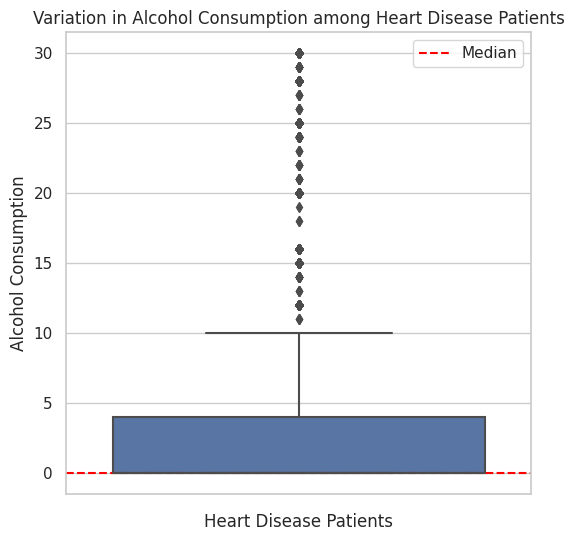

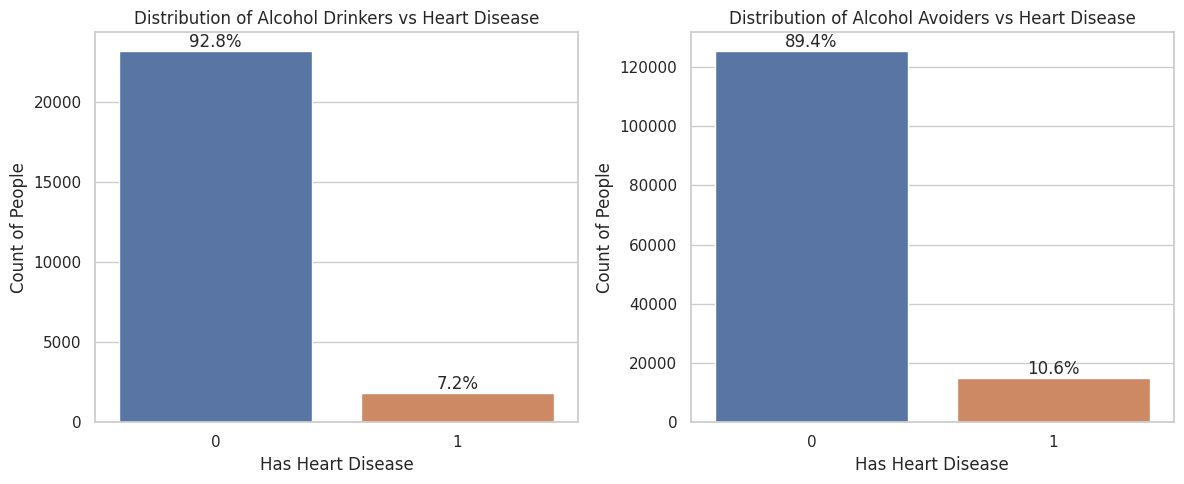

In [ ]:

query = """
    SELECT *
    FROM heart_df
    WHERE Heart_Disease = 1
"""
heart_disease_patients = ps.sqldf(query, locals())

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))


sns.boxplot(data=heart_disease_patients, y='Alcohol_Consumption', ax=axes)
axes.set_xlabel('Heart Disease Patients')
axes.set_ylabel('Alcohol Consumption')
axes.set_title('Variation in Alcohol Consumption among Heart Disease Patients')


median_alcohol = heart_disease_patients['Alcohol_Consumption'].median()
axes.axhline(median_alcohol, color='red', linestyle='--', label='Median')
axes.legend()
plt.show()
print('\n' * 2)

sns.set(style="whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

query = """
    SELECT *
    FROM heart_df
    WHERE Alcohol_Consumption = 1
"""
alcohol_drinkers = ps.sqldf(query, locals())

heart_disease_count_alcohol = alcohol_drinkers['Heart_Disease'].value_counts()
drinkx = sns.barplot(x=heart_disease_count_alcohol.index, y=heart_disease_count_alcohol.values, ax=axes[0])
total_dr = len(alcohol_drinkers)
for p in drinkx.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_dr)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    drinkx.annotate(percentage, (x, y), ha='center', va='bottom')
axes[0].set_xlabel('Has Heart Disease')
axes[0].set_ylabel('Count of People')
axes[0].set_title('Distribution of Alcohol Drinkers vs Heart Disease')


query = """
    SELECT *
    FROM heart_df
    WHERE Alcohol_Consumption = 0
"""
alcohol_avoiders = ps.sqldf(query, locals())

heart_disease_count_no_alcohol = alcohol_avoiders['Heart_Disease'].value_counts()
avoidx = sns.barplot(x=heart_disease_count_no_alcohol.index, y=heart_disease_count_no_alcohol.values, ax=axes[1])
total_no_dr = len(alcohol_avoiders)
for p in avoidx.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_no_dr)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    avoidx.annotate(percentage, (x, y), ha='center', va='bottom')
axes[1].set_xlabel('Has Heart Disease')
axes[1].set_ylabel('Count of People')
axes[1].set_title('Distribution of Alcohol Avoiders vs Heart Disease')


plt.tight_layout()

plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(heart_df['Alcohol_Consumption'], heart_df['Heart_Disease'])


print(contingency_table)
# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)


print(f"P-value: {p}")
# Check if the association is statistically significant
if p < 0.05:
    print("The association between alcohol consumption and heart disease is statistically significant.")
else:
    print("There is no statistically significant association between alcohol consumption and heart disease.")


Heart_Disease             0      1
Alcohol_Consumption               
0.0                  125374  14819
1.0                   23181   1798
2.0                   18530   1209
3.0                   10830    648
4.0                   21976   1387
5.0                    9165    457
6.0                    3346    172
7.0                    2460    112
8.0                   12825    613
9.0                     227     12
10.0                   7501    380
11.0                     38      3
12.0                   8374    451
13.0                     72      4
14.0                    460     26
15.0                   5888    289
16.0                   3419    183
17.0                     78      0
18.0                    194      2
19.0                     10      1
20.0                   8833    539
21.0                    187     10
22.0                    143      9
23.0                     60      5
24.0                   1178     75
25.0                   2504    166
26.0                

In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(heart_df['Heart_Disease'], heart_df['Alcohol_Consumption'])
print(f'T-test p-value: {p_value}')

T-test p-value: 0.0


## 13) Distribution of Heart Disease Patients based on Smoking History

A positive correlation is observed regarding smoking history and heart disease, as patients with a smoking history exhibit a higher heart disease rate of 11.6%, compared to a somewhat lower rate of 7.6% in those without a smoking history. This suggests a potential link between smoking habits and the distribution of heart disease patients.

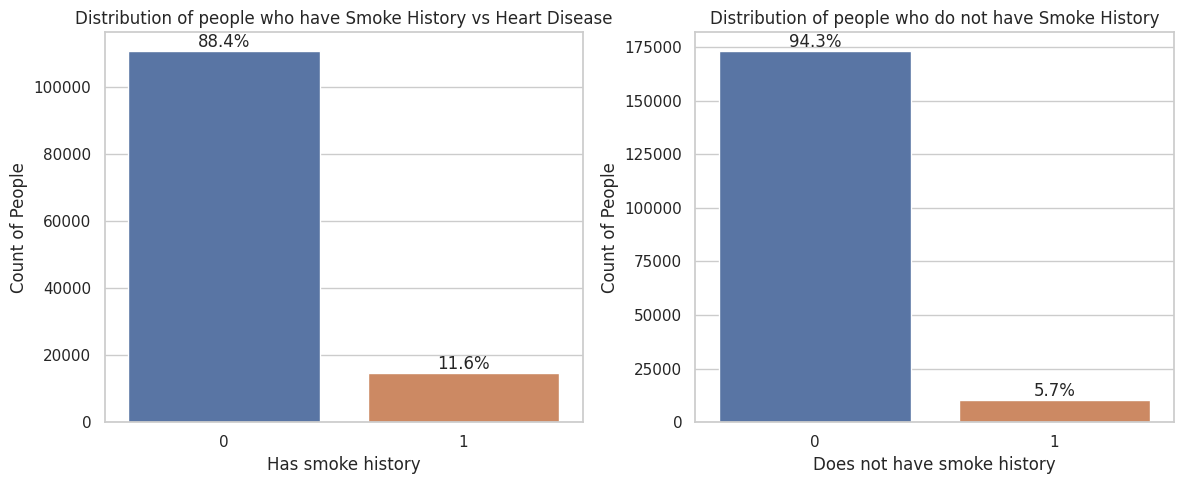

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

query = """
    SELECT *
    FROM heart_df
    WHERE Smoking_History = 1
"""
smokers = ps.sqldf(query, locals())


heart_disease_counts_smoke = smokers['Heart_Disease'].value_counts()
smok = sns.barplot(x=heart_disease_counts_smoke.index, y=heart_disease_counts_smoke.values, ax=axes[0])
totalSmok = len(smokers)
for p in smok.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / totalSmok)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    smok.annotate(percentage, (x, y), ha='center', va='bottom')
axes[0].set_xlabel('Has smoke history')
axes[0].set_ylabel('Count of People')
axes[0].set_title('Distribution of people who have Smoke History vs Heart Disease')


query = """
    SELECT *
    FROM heart_df
    WHERE Smoking_History = 0
"""
not_smokers = ps.sqldf(query, locals())

heart_disease_counts_not_smoke = not_smokers['Heart_Disease'].value_counts()
notSmok = sns.barplot(x=heart_disease_counts_not_smoke.index, y=heart_disease_counts_not_smoke.values, ax=axes[1])
totalNotSmok = len(not_smokers)
for p in notSmok.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / totalNotSmok)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    notSmok.annotate(percentage, (x, y), ha='center', va='bottom')
axes[1].set_xlabel('Does not have smoke history')
axes[1].set_ylabel('Count of People')
axes[1].set_title('Distribution of people who do not have Smoke History')


plt.tight_layout()


plt.show()


## 14) Impact of fruit consumption ,Vegetable Consumption and Fried Potato Consumption on heart Disease


As the consumption patterns for fruit, vegetable and fried potato varies significantly when we segment user by age groups (something that is not evident with alcohol and smoking history), we will analyze consumption habits based on age groups.

Findings: Across all age groups, low fruit consumption is associated with a higher prevalence of heart diseases. In all age groups except adults, low vegetable consumption correlates with an increased risk of heart diseases. While heart rates remain consistent across age groups regardless of fried potato consumption, the elderly group stands out, showing a higher heart disease rate among those who consume more fried potatoes.

#### ***Note: We have used plotly to implement the plots in this section***

In [ ]:
#segmenting users based on age groups
consumption_df=health_df.copy()
consumption_df.columns = health_df.columns.str.lower().str.replace(" ", "_")
consumption_df.rename(columns = {'height_(cm)' : 'height', 'weight_(kg)' : 'weight', 'green_vegetables_consumption' : 'vegetables_consumption', 'friedpotato_consumption' : 'potato_consumption'}, inplace = True)
consumption_df['age_category'] = consumption_df['age_category'].replace('18-24', 'Young')
consumption_df['age_category'] = consumption_df['age_category'].replace('25-29', 'Adult')
consumption_df['age_category'] = consumption_df['age_category'].replace('30-34', 'Adult')
consumption_df['age_category'] = consumption_df['age_category'].replace('35-39', 'Adult')
consumption_df['age_category'] = consumption_df['age_category'].replace('40-44', 'Mid-Aged')
consumption_df['age_category'] = consumption_df['age_category'].replace('45-49', 'Mid-Aged')
consumption_df['age_category'] = consumption_df['age_category'].replace('50-54', 'Mid-Aged')
consumption_df['age_category'] = consumption_df['age_category'].replace('55-59', 'Senior-Adult')
consumption_df['age_category'] = consumption_df['age_category'].replace('60-64', 'Senior-Adult')
consumption_df['age_category'] = consumption_df['age_category'].replace('65-69', 'Elderly')
consumption_df['age_category'] = consumption_df['age_category'].replace('70-74', 'Elderly')
consumption_df['age_category'] = consumption_df['age_category'].replace('75-79', 'Elderly')
consumption_df['age_category'] = consumption_df['age_category'].replace('80+', 'Elderly')

In [ ]:
#Changing the Data Types of consumption columns
col = ['fruit_consumption', 'vegetables_consumption', 'potato_consumption']

for i in col:
    consumption_df[i] = consumption_df[i].astype(int)

#### So, before assessing the impact of Fruit, Fried potato and Green Vegetables consumption on Heart Disease we see what these consumption values tell us about the general health of the people.

So for this we separate the 'Heart_Disease' and 'General_Health' columns in one table and we separate the fruit, potato and vegetable consumption in another table and then join them and calculate the mean of these consumptions by grouping them according to the unique values in the 'General Health' column. We then plot the results obtained.

We observed that people who reported 'Excellent' and 'Very Good' general health had very high  'Fruit' and ' Green Vegetable' consumption levels as compared to those who reported 'Fair' and 'Poor' General health levels.

Similarly, the people who reported 'Fair' and 'Poor' General health levels had high  'Fried Potato' consumption levels as compared to those who reported 'Excellent' and 'Very Good' general health.

In [ ]:
query_heart_health = """
    SELECT Heart_Disease, General_Health
    FROM health_df
"""

query_food_consumption = """
    SELECT FriedPotato_Consumption, Green_Vegetables_Consumption, Fruit_Consumption
    FROM health_df
"""

heart_health_df = ps.sqldf(query_heart_health, locals())
food_consumption_df = ps.sqldf(query_food_consumption, locals())

joined_df = pd.concat([heart_health_df, food_consumption_df], axis=1)

In [ ]:
mean_fried_potato = joined_df.groupby('General_Health')['FriedPotato_Consumption'].mean()
mean_green_vegetables = joined_df.groupby('General_Health')['Green_Vegetables_Consumption'].mean()
mean_fruit = joined_df.groupby('General_Health')['Fruit_Consumption'].mean()

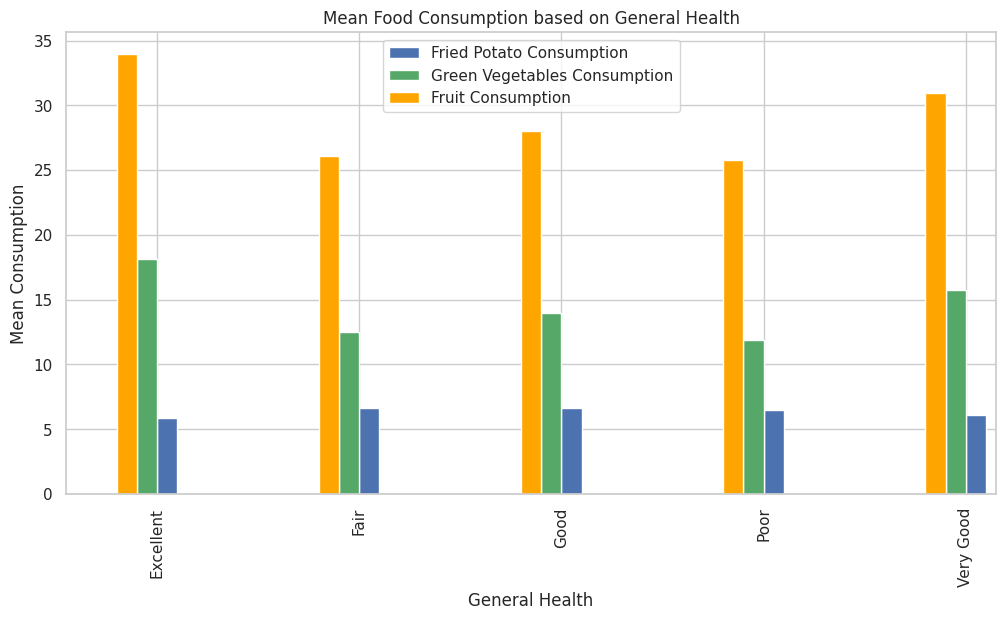

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

mean_fried_potato.plot(kind='bar', ax=ax, color='b', position=0, width=0.1, label='Fried Potato Consumption')
mean_green_vegetables.plot(kind='bar', ax=ax, color='g', position=1, width=0.1, label='Green Vegetables Consumption')
mean_fruit.plot(kind='bar', ax=ax, color='orange', position=2, width=0.1, label='Fruit Consumption')

ax.set_ylabel('Mean Consumption')
ax.set_xlabel('General Health')
ax.legend()
plt.title('Mean Food Consumption based on General Health')
plt.show()

In [ ]:
# Distribution of Age Categories in the Dataset
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
import matplotlib.pyplot as plt
colors = px.colors.sequential.Plasma_r
age_category_counts = consumption_df['age_category'].value_counts()

plt.figure(figsize=(8, 6))
colors = px.colors.sequential.Viridis

fig1 = px.bar(x=age_category_counts.index, y=age_category_counts.values, color=age_category_counts.index, color_discrete_sequence=colors,
              labels={'x': 'Age Category', 'y': 'Count'})

fig1.update_layout(title="1. Distribution of Age Categories in the Dataset",
                   xaxis_title="", yaxis_title="Count", plot_bgcolor='white', width=800, height=600)

fig1.show()

<Figure size 800x600 with 0 Axes>

In [ ]:
columns = ['fruit_consumption', 'vegetables_consumption', 'potato_consumption']
titles = ["Fruit Consumption", "Vegetables Consumption", "Potato Consumption"]

for i, col in enumerate(columns):
    grouped_data = consumption_df.groupby(['age_category', 'heart_disease'], as_index=False)[col].median()  # Use median here
    fig = px.bar(grouped_data, x='age_category', y=col, color='heart_disease', color_discrete_sequence=colors, barmode='group', title=f"Impact of {titles[i]} on Heart Disease")
    fig.update_layout(
        xaxis_title="Age Group", yaxis_title=f"Median {titles[i]}", legend_title="Heart Disease",
        xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='white',
        width=800, height=500
    )
    fig.show()
    print('\n', "-"*80, '\n')


 -------------------------------------------------------------------------------- 




 -------------------------------------------------------------------------------- 




 -------------------------------------------------------------------------------- 



#FEATURE ENGINEERING

###MINORITY OVERSAMPLING

Imbalanced datasets pose a common problem in binary classification problems. This scenario frequently arises in practical business applications like fraud detection, spam filtering, rare disease discovery, and hardware fault detection. To address this issue, one frequently used technique is Synthetic Minority Oversampling Technique (SMOTE). SMOTE is specifically designed to tackle imbalanced datasets by generating synthetic samples for the minority class.

In [ ]:
# Let's check the imbalance in the dataset
df_encoded['Heart_Disease'].value_counts()

0    283803
1     24971
Name: Heart_Disease, dtype: int64

In [ ]:
X = df_encoded.drop("Heart_Disease", axis = 1)
y = df_encoded['Heart_Disease']

#Using SMOTE to handle dataset imbalance
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
# Here, we split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

### HANDLING OUTLIERS

Outliers are often considered as noise in the data. Removing them can lead to a
more robust model that is less sensitive to extreme value, as well as avoid outliers in the minority class disproportionately affect the model's learning process.

In the case of imbalanced datasets such as this one, maintaining a balance between the classes is important in order to remain fair, as well as to avoid biased predictions. Since outliers in the minority class can disproportionately influence the model's learning process, we should consider removing outliers, which we show helps achieve a more balanced representation of the target classes.

we calculate the Interquartile Range (IQR), which is a way to measure the spread of the middle 50% of a dataset. It is calculated as the difference between the first quartile* (the 25th percentile) and the third quartile (the 75th percentile) of a dataset.

We then use a threshold value k, to scale the IQR :

The formula for outlier detection using the IQR method is as follows:

Lower Bound = Q1 - k * IQR <br>
Upper Bound = Q3 + k * IQR <br>

Below we plot boxplots to visualize the distribution of the selected columns where we expect to find outliers. We keep a higher threshold value, since our model is required to be a little sensitive to outliers given the context.



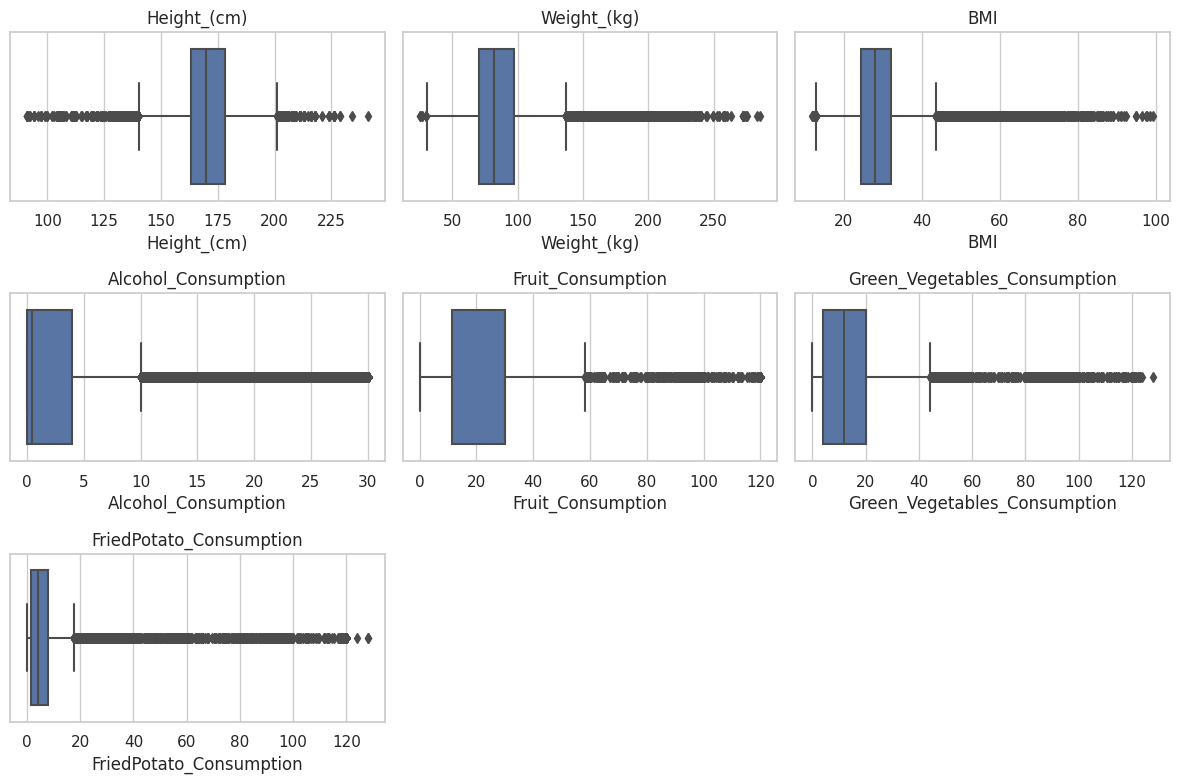

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# We select the below columns to find the distribution of data
selected_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
                    'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
for column in selected_columns:
    plt.subplot(3, 3, selected_columns.index(column) + 1)
    sns.boxplot(x=X_train[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
selected_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
                    'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# We use the IQR method to remove outliers
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

#Higher threshold means more outliers are retained, which is important to us in cases of say, poor health or high potato consumption cases
threshold = 6

# We create a mask to filter out the rows
outlier_mask = (
    (X_train[selected_columns] < (Q1 - threshold * IQR)) |
    (X_train[selected_columns] > (Q3 + threshold * IQR))
).any(axis=1)

X_train_clean = X_train[~outlier_mask]
y_train_clean = y_train[~outlier_mask]

# We observe how many rows are removed
num_rows_removed = len(X_train) - len(X_train_clean)
print(f"Number of rows removed due to outliers: {num_rows_removed}")
print(IQR)

Number of rows removed due to outliers: 24051
Height_(cm)                     15.266169
Weight_(kg)                     26.736535
BMI                              7.689510
Alcohol_Consumption              4.000000
Fruit_Consumption               18.774725
Green_Vegetables_Consumption    16.000000
FriedPotato_Consumption          6.545790
dtype: float64


In [ ]:
categorical_cols = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression',
                    'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

#One hot encoding of the above categorical columns
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_encoded = pd.get_dummies(X_train_clean, columns=categorical_cols, drop_first=True)

X_test_encoded

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_1,General_Health_2,General_Health_3,...,Age_Category_4,Age_Category_5,Age_Category_6,Age_Category_7,Age_Category_8,Age_Category_9,Age_Category_10,Age_Category_11,Age_Category_12,Smoking_History_1
532448,173.000000,68.994920,23.131297,27.628735,18.102988,28.948506,1.422759,0,1,0,...,0,0,0,0,0,0,1,0,0,1
467457,148.894827,76.996362,34.785901,0.138147,0.276293,1.723707,0.861853,1,0,0,...,0,0,0,0,0,1,0,0,0,1
71649,175.000000,90.720000,29.530000,0.000000,8.000000,30.000000,4.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
212791,163.000000,72.570000,27.460000,20.000000,0.000000,12.000000,4.000000,0,1,0,...,0,0,0,0,0,0,1,0,0,1
51599,178.000000,83.910000,26.540000,12.000000,90.000000,30.000000,12.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451152,167.784079,76.620579,27.321244,0.000000,40.000000,15.712106,3.856053,0,1,0,...,0,0,0,0,1,0,0,0,0,1
451068,182.048803,90.000261,27.145365,22.731737,60.000000,1.268263,2.048803,0,1,0,...,0,0,0,0,1,0,0,0,0,0
399314,155.521654,81.650000,33.725699,0.000000,9.043308,9.913385,30.000000,1,0,0,...,0,0,0,1,0,0,0,0,0,1
162876,178.000000,74.840000,23.670000,30.000000,30.000000,8.000000,8.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#MODELLING

###BASELINE MODEL

Now that we have a balanced dataset with extreme outliers removed, we will begin to train a baseline model for our data. We will be making use of Logistic Regression as a baseline model, since the problem intuitively corresponds to a binary classification problem.

Further, each model is accompanied by 3 visualizations:
1. The classification report
2. The confusion matrix
3. The AUC ROC curve


###PCA

We decided to carry out PCA for several important reasons :
1. adjusting the scale of the data (especially between encoded and unencoded features)
2. reducing the number of features/ identifying principal features, reducing noise
3. improving computational efficiency.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
# First step of PCA is to scale the data. This step also helped us in achieving higher accuracy scores even though PCA did not a major impact.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [ ]:
from sklearn.decomposition import PCA

# we instantitate and fit PCA to our scaled data
pca = PCA()
X2_pca = pca.fit_transform(X_scaled)

In [ ]:
# Calculating cum_evr ratios to plot below
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = explained_variance_ratios.cumsum()

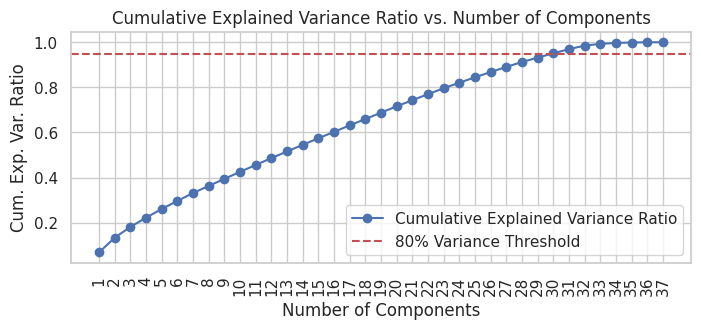

In [ ]:
plt.figure(figsize=(8, 3))

plt.plot(range(1, len(cum_evr) + 1), cum_evr, marker='o', linestyle='-', color='b', label='Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='--', label='80% Variance Threshold')

plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cum. Exp. Var. Ratio')

plt.xticks(range(1, len(cum_evr) + 1), rotation='vertical')
plt.legend()

plt.show()

In [ ]:
# we find 29 components lying below the 80% cum_evr threshold. This means they explain around 80% of the variance in the data. However, on carrying out modelling with
# the PCA-fitted data, we were unable to achieve higher accuracy scores, the reason for which we touch on below as well in the presentation
pca_final = PCA(n_components=29)

scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_encoded)

X_train_pca = pca_final.fit_transform(X_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

We find that carrying out PCA had no noticeable improvement on the accuracy of the models below. This could be because PCA effectiveness depends on the presence of linear relationships and on strong correlation in the data. Due to the lack of both of these characteristics in our dataset, PCA was not effective. Further, a few of our models excel at learning complex relationships themselves, thereby reducing the utility of PCA.

##LOGISTIC REGRESSION

Logistic Regression as a baseline model was particularly appealing to us, due to its simplicity, Interpretability, efficiency, baseline performance, and benchmarking ability.

In [ ]:
# We initialize and fit Logistic Regression
model_log_reg = LogisticRegression()
model_log_reg.fit(X_scaled, y_train_clean)

LogisticRegression()

In [ ]:
y_pred = model_log_reg.predict(X_test_scaled)

In [ ]:
# we list the general metrics associated
test_accuracy = accuracy_score(y_test, y_pred)
classification_repo = classification_report(y_test, y_pred, output_dict=True)
confusion_matr = confusion_matrix(y_test, y_pred)

Accuracy: 0.82


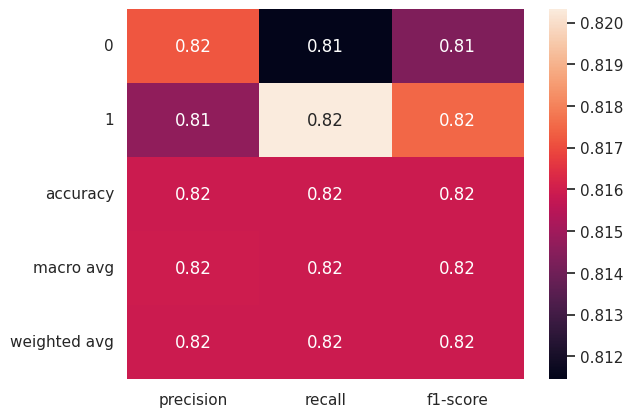

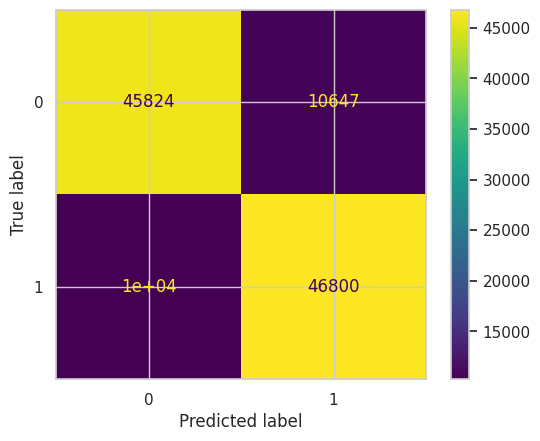

In [ ]:
# we use a heatmap plot to display the classification report, as well the built in confusion matrix to visualize
print("Accuracy: {:0.2f}".format(test_accuracy))
sns.heatmap(pd.DataFrame(classification_repo).iloc[:-1, :].T, annot=True)
ConfusionMatrixDisplay(confusion_matr).plot()

##Area Under ROC Curve


ROC (Receiver Operating Characteristic) is a graph showing the performance of a binary classification model at various thresholds.

It is created by plotting the True Positive Rate (sensitivity) against the False Positive Rate (1-specifity) at various thresholds. The curve basically shows us how the model's performance changes as the decision boundary for classifying each of the instances is varied.

A diagonal line across the graph represents the performance of a random classifier. From this, we can understand that a good classifier should have an ROC curve that is higher and farther away to the top-left from this diagonal. A higher AUC-ROC value (closer to 1) indicates better differentiation between the positive and negative classes.

Since ROC does not depend on the class distribution, it is useful for evaluating classifiers predicting rare events such as diseases (such as in this case) or disasters. In contrast, evaluating performance using accuracy would favor classifiers that always predict a negative outcome for rare events.

In the ROC curve below, we see that logistic regression model performs well for true positive decision boundaries upto 0.82, where the false positive rate is still relatively low, but this increases in a diagonal beyond that threshold.

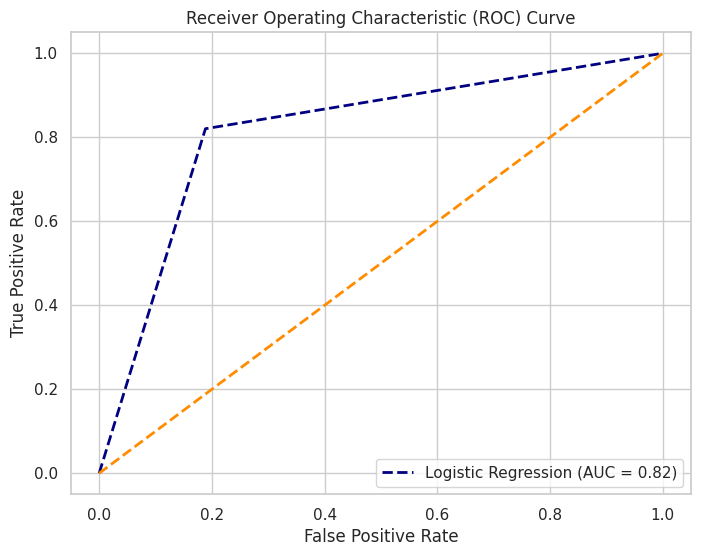

In [ ]:
# we calculate auc score for Logistic Regression
log_auc = roc_auc_score(y_test, y_pred)

# find the curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', lw=2, linestyle='--', label='Logistic Regression (AUC = %0.2f)' % log_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

###HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION

Hyperparamter Tuning can be used to optimize the performance of Logistic Regression. The common hyperparameters associated with logistic regression are :

1. Regularization (C) : We use the regularization term to prevent overfitting. The regularization parameter C controls the strength of regularization. Smaller values of C result in stronger regularization.

2. Penalty: Logistic regression supports two types of penalties: L1 and L2. The choice between them is often data-dependent. The penalty hyperparameter in scikit-learn can take values 'l1' or 'l2'.

We will be attempting to perform Hyperparameter Tuning on both of these parameters, and assess if the tunes hyperparameters make an impact on metrics. We perform hyperparameter tuning using cross-validation to get reliable estimates of model performance, and make use of RandomizedSearchCV class in scikit-learn to automate this process.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV


# we begin with an initial choice for C
log_reg_params = {
    'C': np.logspace(-2, 2, 20),
}

# initialize automated search to find the best hyperparameters
log_reg_random = RandomizedSearchCV(
    LogisticRegression(random_state=42, max_iter=500),
    param_distributions=log_reg_params,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# here, we run the search
log_reg_random.fit(X_scaled, y_train_clean)
log_reg_best_params = log_reg_random.best_params_
log_reg_best_params

{'C': 61.584821106602604}


The best hyperparameters for the Logistic Regression model, as found by the Random Search, are:

    C (Inverse of regularization strength): 61.58
    penalty (Used to specify the norm used in the penalization): l2

These hyperparameters resulted in the highest AUC-ROC score during the cross-validation.


Accuracy: 0.82

Classification Report:
 {'0': {'precision': 0.8171912617030762, 'recall': 0.8114607497653663, 'f1-score': 0.8143159241554564, 'support': 56471}, '1': {'precision': 0.814663951120163, 'recall': 0.8203186622495662, 'f1-score': 0.8174815280616256, 'support': 57051}, 'accuracy': 0.8159123341731118, 'macro avg': {'precision': 0.8159276064116197, 'recall': 0.8158897060074662, 'f1-score': 0.815898726108541, 'support': 113522}, 'weighted avg': {'precision': 0.8159211502174982, 'recall': 0.8159123341731118, 'f1-score': 0.8159068128682245, 'support': 113522}}


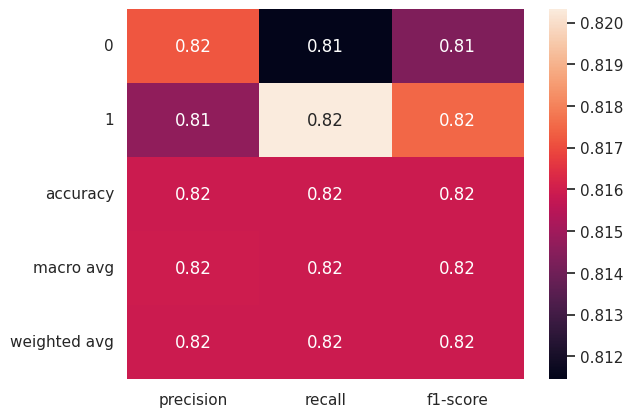

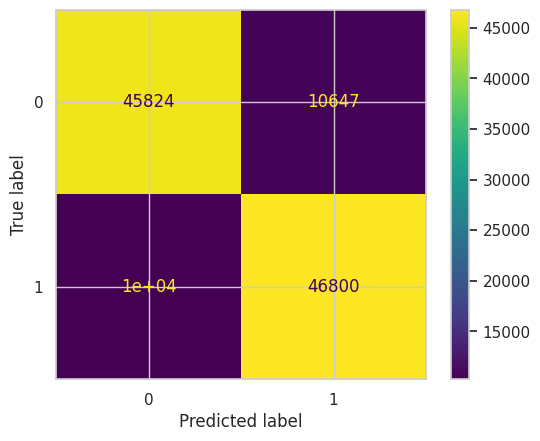

In [ ]:
# we create a model with the best found hyperparameters
log_reg_optimized = LogisticRegression(**log_reg_best_params, random_state=42, max_iter=500)

log_reg_optimized.fit(X_scaled, y_train_clean)
y_pred_optimized = log_reg_optimized.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_pred)
classification_repo = classification_report(y_test, y_pred, output_dict=True)
confusion_matr = confusion_matrix(y_test, y_pred)
print("Accuracy: {:0.2f}".format(test_accuracy))
sns.heatmap(pd.DataFrame(classification_repo).iloc[:-1, :].T, annot=True)
print("\nClassification Report:\n", classification_repo)
ConfusionMatrixDisplay(confusion_matr).plot()

As seen from above, these results are very similar to the results obtained using the default parameters.

This could be due to the fact that the default parameters were already quite good for this problem, or it could indicate that there's not much room for improvement with this model and dataset.

## DECISION TREE CLASSIFIER

Now, we attempt to model the data using a Decision Tree Classifier. Some of the reasons why we opted to use Decision trees as the next model are :
1. They easy to understand and interpret.
2. Decision trees are capable of capturing non-linear patterns in the data, making them suitable for modeling the intricate relationships between different variables.
3. Decision trees can handle both numerical and categorical features, which is beneficial in medical datasets where you may have a mix of types of data.
4. Decision trees are not sensitive to the scale of input features. Unlike some other machine learning algorithms (e.g., support vector machines or neural networks), decision trees do not require feature scaling, simplifying the preprocessing steps.
5. Decision trees are computationally efficient and easy to implement. They are less prone to overfitting, and their training process can be relatively fast.

In [ ]:
# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_clean, y_train_clean)

dt_predictions = dt_model.predict(X_test)

Decision Tree Classifier Accuracy: 0.88
Decision Tree Classifier Classification Report:


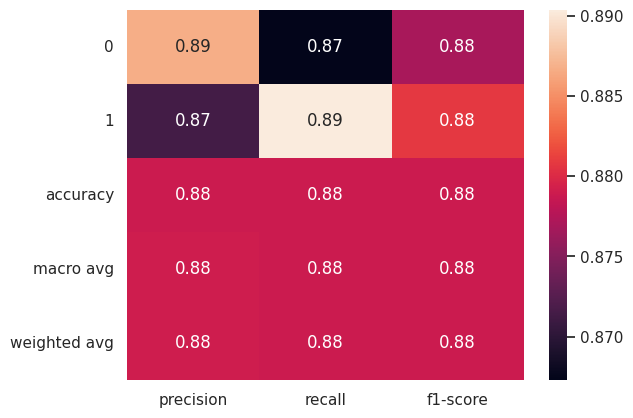

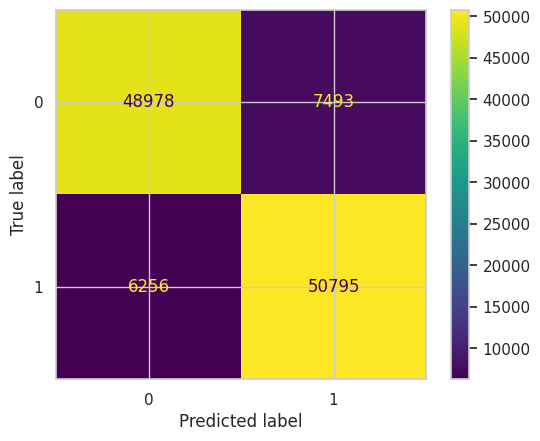

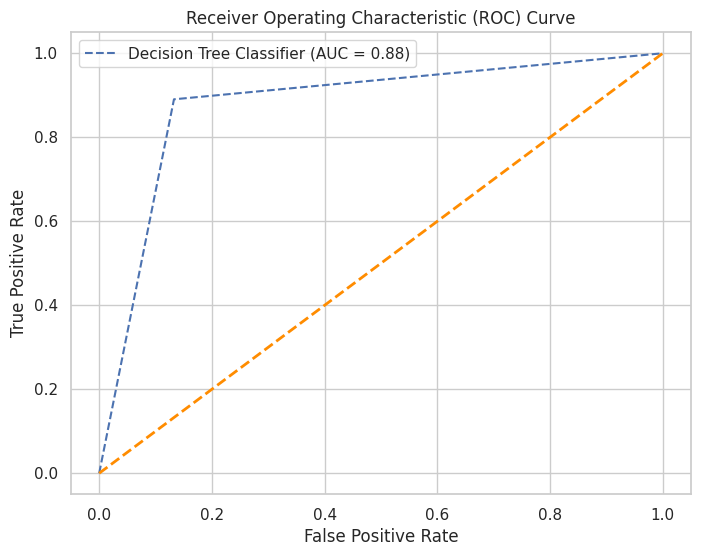

In [ ]:
# calculate AUC for Decision Tree, as well as the curve
dt_auc = roc_auc_score(y_test, dt_predictions)
fpr, tpr, _ = roc_curve(y_test, dt_predictions)

accuracy = accuracy_score(y_test, dt_predictions)
conf_mat = confusion_matrix(y_test, dt_predictions)
repo = classification_report(y_test, dt_predictions, output_dict=True)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")
print("Decision Tree Classifier Classification Report:")
sns.heatmap(pd.DataFrame(repo).iloc[:-1, :].T, annot=True)
ConfusionMatrixDisplay(conf_mat).plot()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Decision Tree Classifier (AUC = %0.2f)' % dt_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

GridSearchCV is another function provided by the sklearn for hyperparameter tuning. It stands for Grid Search Cross-Validation.

Why did we decide to use GridSearchCSV ? Because it allows us to define a grid of hyperparameter values to search over, and exhaustively tries all possible combinations of hyperparameters, helping us find the best set of hyperparameters via an automated method.



In [ ]:
from sklearn.model_selection import GridSearchCV

# we define a grid to carry out grid search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# initializing the grid search
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#running the search
grid_search.fit(X_train_clean, y_train_clean)


print("Best Hyperparameters:", grid_search.best_params_)
best_dt_model = grid_search.best_estimator_
dt_best_predictions = best_dt_model.predict(X_test)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


Decision Tree Classifier Accuracy: 0.88
Decision Tree Classifier Classification Report:


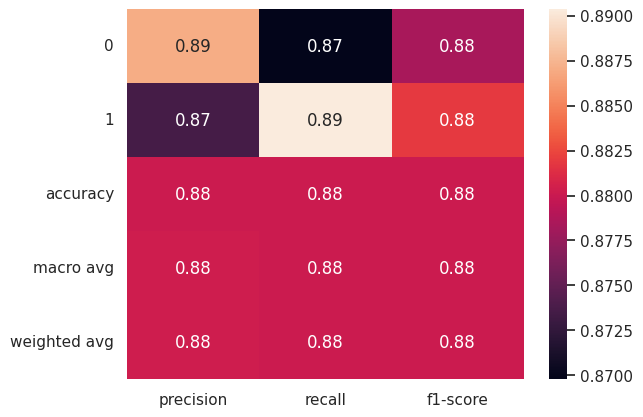

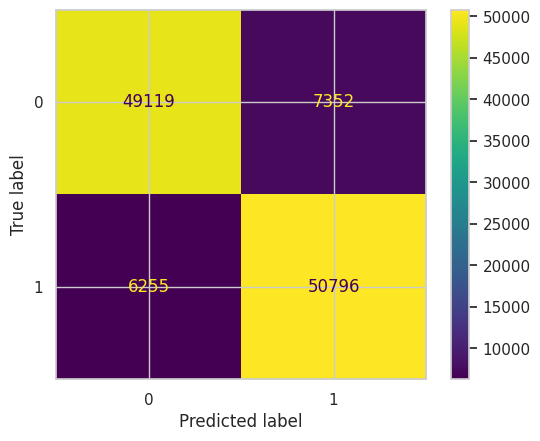

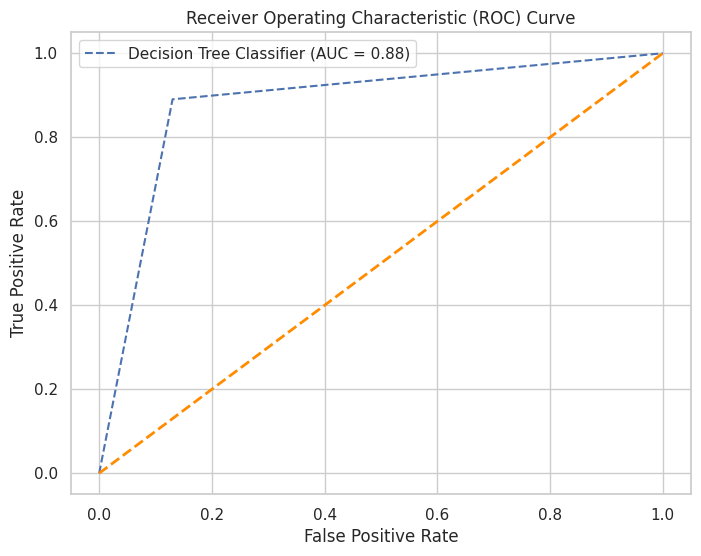

In [ ]:
# Now, we find the AUC score and curve with the predictions from the Decision Tree model fitted with the best hyperparameters found
dt_auc = roc_auc_score(y_test, dt_best_predictions)
fpr, tpr, _ = roc_curve(y_test, dt_best_predictions)

accuracy = accuracy_score(y_test, dt_best_predictions)
conf_best_mat = confusion_matrix(y_test, dt_best_predictions)
optim_repo = classification_report(y_test, dt_best_predictions, output_dict=True)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")
print("Decision Tree Classifier Classification Report:")
sns.heatmap(pd.DataFrame(optim_repo).iloc[:-1, :].T, annot=True)
ConfusionMatrixDisplay(conf_best_mat).plot()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Decision Tree Classifier (AUC = %0.2f)' % dt_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

As seen from above, we report no noticeable improvment in the use of the best hyperparameters in Decision Tree Model. This could be because like Logistic Regression, the default parameters were good enough for this problem. It could also be that Decision Tree Model or the dataset itself has no room for improvement in this context.


Below, we plot out the top 10 important features that are also attributes within the dataset. This helps us understand which attributes emerge as important features during the training and testing process, allowing us to understand its impact on the final prediction.

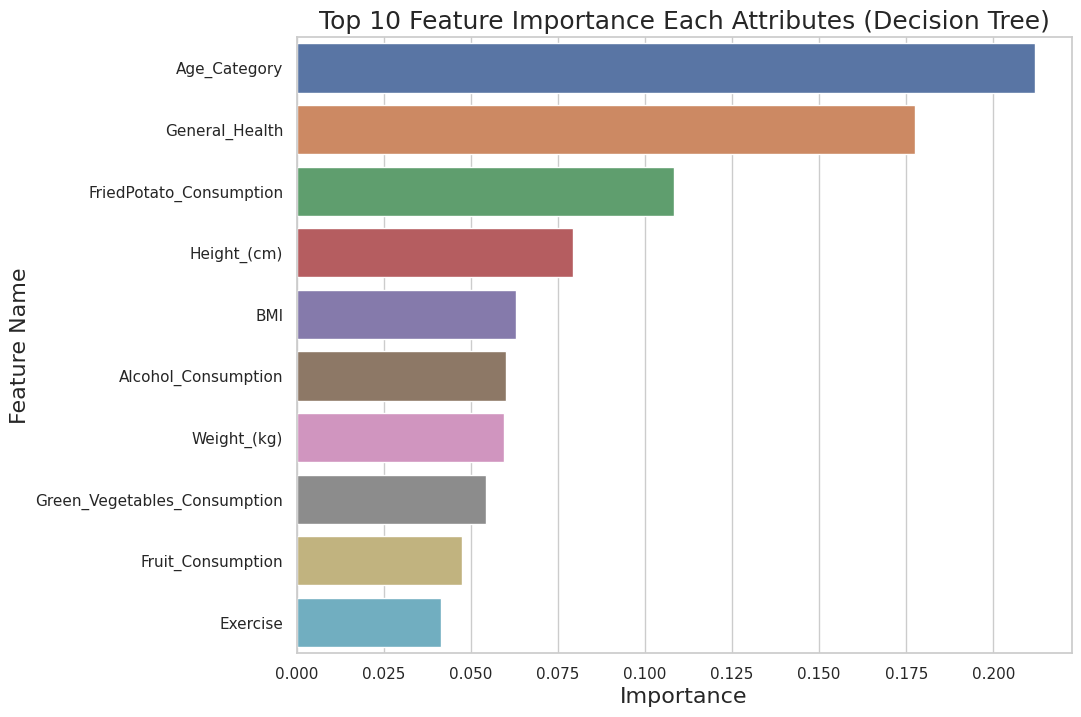

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train_clean.columns,
    "Importance": dt_model.feature_importances_  # we get the feature importances from the Decision Tree Model
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

We will now print and visualize the decision tree model that has been trained on the provided dataset. This will provide a graphical representation of the sequential decisions made by the model based on specific features, allowing us to gain insights into its decision-making process. The plot_tree function is employed to create a clear and interpretable diagram, showcasing the structure of the decision tree. The visualization will aid in understanding how the model classifies instances and which features play a crucial role in its decision logic

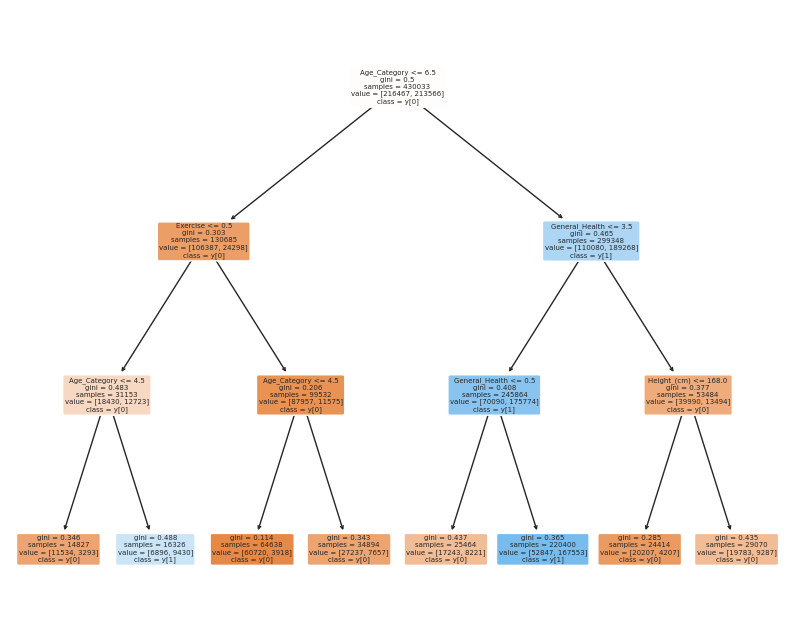

In [ ]:
# Here, we visualize the decision tree model
dt_model_visualize = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model_visualize.fit(X_train_clean, y_train_clean)

plt.figure(figsize=(10, 8))
plot_tree(dt_model_visualize, feature_names=list(X_train_clean.columns), class_names=True, filled=True, rounded=True)
plt.show()

## RANDOM FOREST CLASSIFIER

Next, we attempt to model the data using a Random Forest Classifier. Some of the reasons why we opted to use Random Forests as the next model are :
1. Random Forests are an ensemble learning method that combines the predictions of multiple decision trees. This ensemble approach often results in higher accuracy compared to individual decision trees.
2. Similar to Decision trees, Random Forests are capable of capturing non-linear patterns in the data, making them suitable for modeling the complex relationships between different variables.
3. They can handle missing values and outliers effectively, and do not require imputation. The ensemble nature of the model makes it robust to outliers.
4. They are also less sensitive to the choice of hyperparameters compared to  other ML algorithms, and can often perform reasonably well with default hyperparameter values.
5. One other important aspect is that they provide a feature importance ranking based on how frequently a feature is used to split the data across all trees. This information can be valuable in identifying the most significant risk factors for heart disease.
6. Finally, Random Forests are less prone to overfitting than individual decision trees. The ensemble averaging helps smooth out the noise and variability in the data, improving the model's generalization to new, unseen data.

In [ ]:
# we intialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_clean, y_train_clean)

rf_predictions = rf_model.predict(X_test)

Random Forest Classifier Accuracy: 0.93
Random Forest Classifier Classification Report:


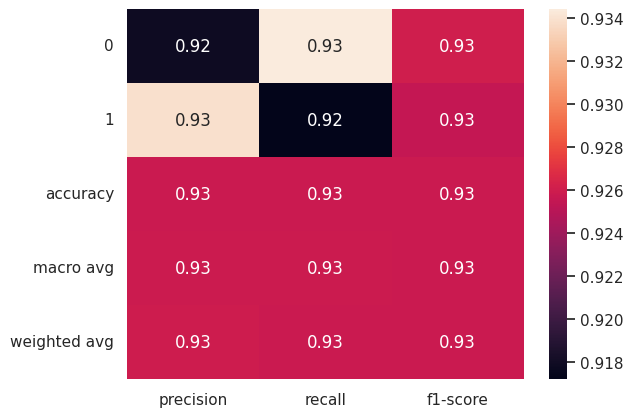

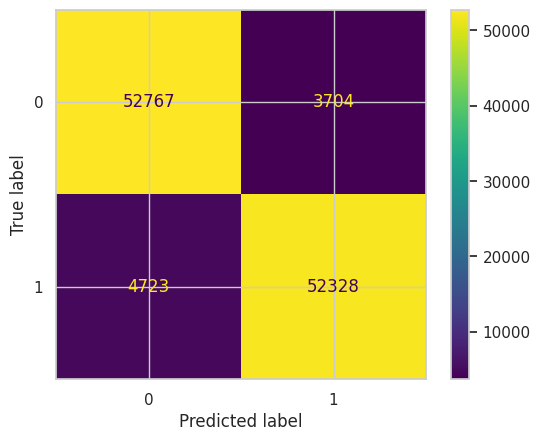

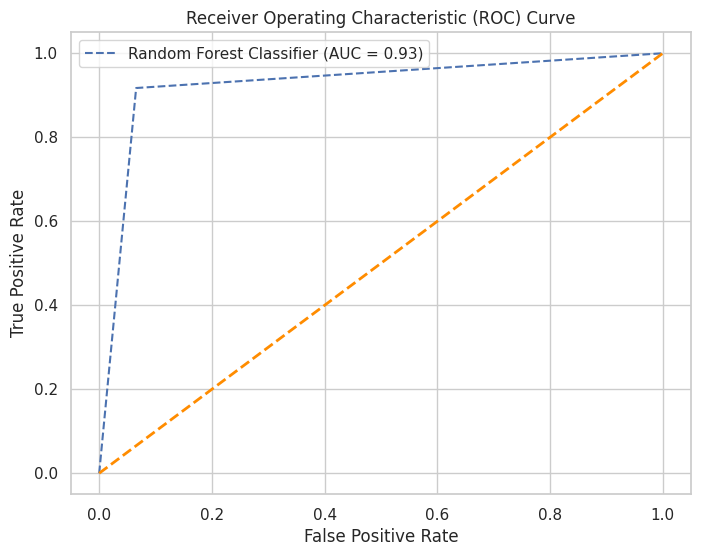

In [ ]:
# we calculate the AUC and curve for the Random Forest Model
rf_auc = roc_auc_score(y_test, rf_predictions)
fpr, tpr, _ = roc_curve(y_test, rf_predictions)

accuracy = accuracy_score(y_test, rf_predictions)
rf_repo = classification_report(y_test, rf_predictions, output_dict=True)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Random Forest Classifier Classification Report:")

sns.heatmap(pd.DataFrame(rf_repo).iloc[:-1, :].T, annot=True)
con_mat = confusion_matrix(y_test, rf_predictions)
ConfusionMatrixDisplay(con_mat).plot()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier (AUC = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

  As it appears, Random Forests have produced the highest accuracy on the dataset so far. This is undoutedly due to all of the aspects of Random Forests highlighted above. We also note here that the skew in the AUC ROC curve to the top left is the very high, indicating a great performance in classifying the True Postives and False Positive values.

Similar to The Decision Tree Classifier, we plot out the top 10 important features that are also attributes within the dataset.

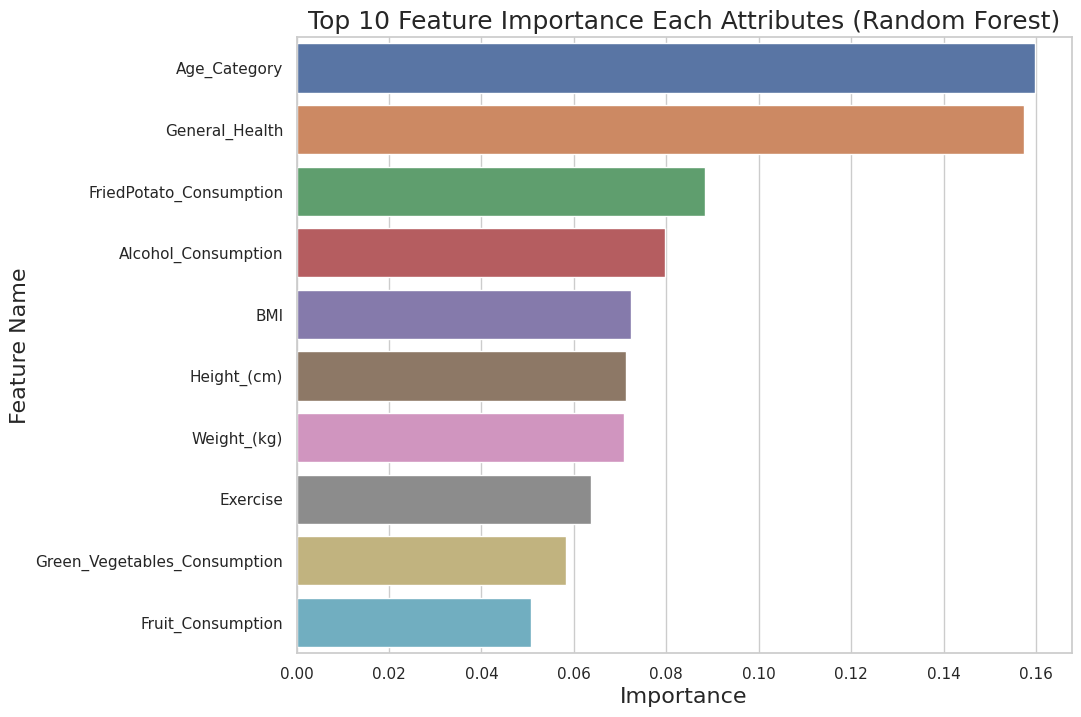

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train_clean.columns,
    "Importance": rf_model.feature_importances_  # we get the feature importances for the Random Forest Model
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

##ARTIFICIAL NEURAL NETWORK

One other model that we were interested in fitting our dataset to, was an Artificial Neural Network. Here are some of the reasons why we decided to try out the ANN :

1. ANNs excel at capturing complex, non-linear relationships within the data.
2. They can automatically learn relevant features from the input data, and can discover hierarchical representations that may be challenging to define explicitly.
3. They can also crucially perform representational learning, where the model learns to represent the data in a way that is most informative for the task. This ability is crucial for capturing latent patterns and hidden structures in the data.
4. Finally, They can also handle missing data more gracefully compared to some traditional machine learning algorithms. They can learn useful representations even when some input features have missing values.

Although we dont expect the ANN to perform better outright, we wanted to observe what kind of performance could be achieved if we made use of this model to fit the data.

In [ ]:
# imports for the FNN
from tensorflow import keras
from keras import layers, callbacks
from keras.models import Sequential
from keras.layers import Dense, Dropout

# we create a 5 layer FNN, with the final layer having a sigmoid activation function in line with binary classification. The rest of the layers use the
# RectifiedlinearUnit (ReLU) as the activation function
model = Sequential()
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# we train for 50 epochs in order to fit the data well
history = model.fit(X_scaled, y_train_clean, batch_size = 25, epochs = 50, validation_split=0.25)

Epoch 1/50
12901/12901 [==============================] - 56s 4ms/step - loss: 0.4019 - accuracy: 0.8171 - val_loss: 0.3967 - val_accuracy: 0.8205
Epoch 2/50
12901/12901 [==============================] - 50s 4ms/step - loss: 0.3921 - accuracy: 0.8220 - val_loss: 0.3932 - val_accuracy: 0.8225
Epoch 3/50
12901/12901 [==============================] - 52s 4ms/step - loss: 0.3889 - accuracy: 0.8231 - val_loss: 0.3902 - val_accuracy: 0.8237
Epoch 4/50
12901/12901 [==============================] - 46s 4ms/step - loss: 0.3862 - accuracy: 0.8247 - val_loss: 0.3882 - val_accuracy: 0.8241
Epoch 5/50
12901/12901 [==============================] - 48s 4ms/step - loss: 0.3842 - accuracy: 0.8258 - val_loss: 0.3878 - val_accuracy: 0.8249
Epoch 6/50
12901/12901 [==============================] - 48s 4ms/step - loss: 0.3821 - accuracy: 0.8265 - val_loss: 0.3867 - val_accuracy: 0.8254
Epoch 7/50
12901/12901 [==============================] - 49s 4ms/step - loss: 0.3803 - accuracy: 0.8278 - val_loss: 0

In [ ]:
# here we make predictions and evaluate accuracy by a threshold value (0.5)
train_preds = model.predict(X_scaled)
train_pred = (train_preds > 0.5).astype(int)
test_preds = model.predict(X_test_scaled)
test_pred = (test_preds > 0.5).astype(int)

train_accuracy = accuracy_score(y_train_clean, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

train_accuracy, test_accuracy

3548/3548 [==============================] - 6s 2ms/step


(0.8536228615013266, 0.8301562692693927)

{'0': {'precision': 0.836354098835106, 'recall': 0.8187742381045138, 'f1-score': 0.8274708066753166, 'support': 56471}, '1': {'precision': 0.8242728115663313, 'recall': 0.8414225868082943, 'f1-score': 0.8327594133004882, 'support': 57051}, 'accuracy': 0.8301562692693927, 'macro avg': {'precision': 0.8303134552007186, 'recall': 0.830098412456404, 'f1-score': 0.8301151099879024, 'support': 113522}, 'weighted avg': {'precision': 0.8302825926955836, 'recall': 0.8301562692693927, 'f1-score': 0.8301286201085952, 'support': 113522}}


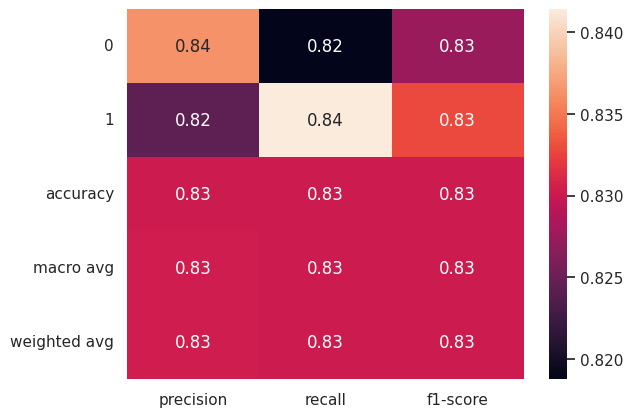

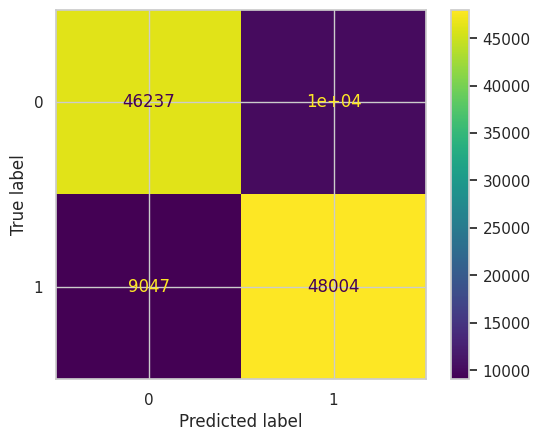

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

classification_rep = classification_report(y_test, test_pred, output_dict=True)
sns.heatmap(pd.DataFrame(classification_rep).iloc[:-1, :].T, annot=True)

c_mat = confusion_matrix(y_test, test_pred)
ConfusionMatrixDisplay(c_mat).plot()

print(classification_rep)

We see that the reported accuracy is only marginally higher than Logistic Regression. Before we attempt to understand why, let us take a look at the AUC ROC curve below

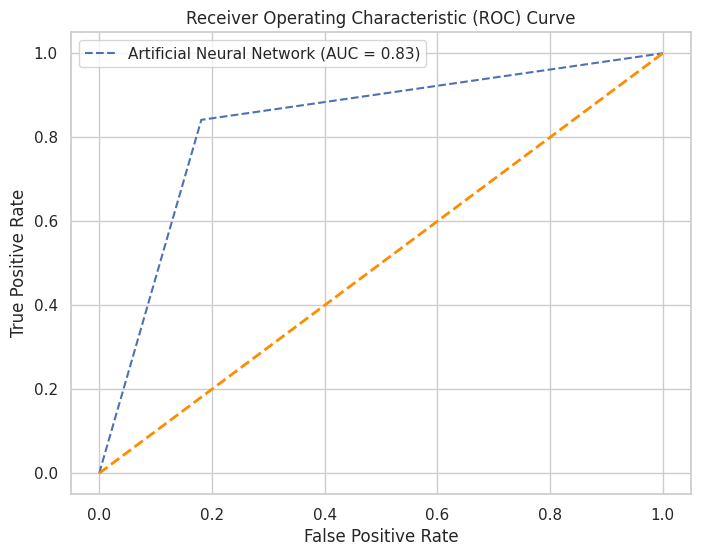

In [ ]:
ann_auc = roc_auc_score(y_test, test_pred)

fpr, tpr, _ = roc_curve(y_test, test_pred)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Artificial Neural Network (AUC = %0.2f)' % ann_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

We find that the ANN has an accuracy that is only marginally higher than Logistic Regression. This could be due to multiple reasons :

1. The size of the dataset is a factor, since Neural Nets tend to require large amounts of data to perform well.
2. Random Forests, being an ensemble method, are more robust and interpretable (along with Decision Trees).
3. Since the task at hand is solved adequately by simpler models, perhaps simpler models are just the better choice in this context.


We note also that the AUC ROC Curve has a score of 0.83, indicating an ability to classify true and false positives marginally better than Logistic Regression

### PLOT AUC COMPARISON

Finally, we plot the AUC comparison for all the models. We see a steady increase in the performance of models in the following order :

Logistic Regression < Neural Network < Decision Tree < Random Forest

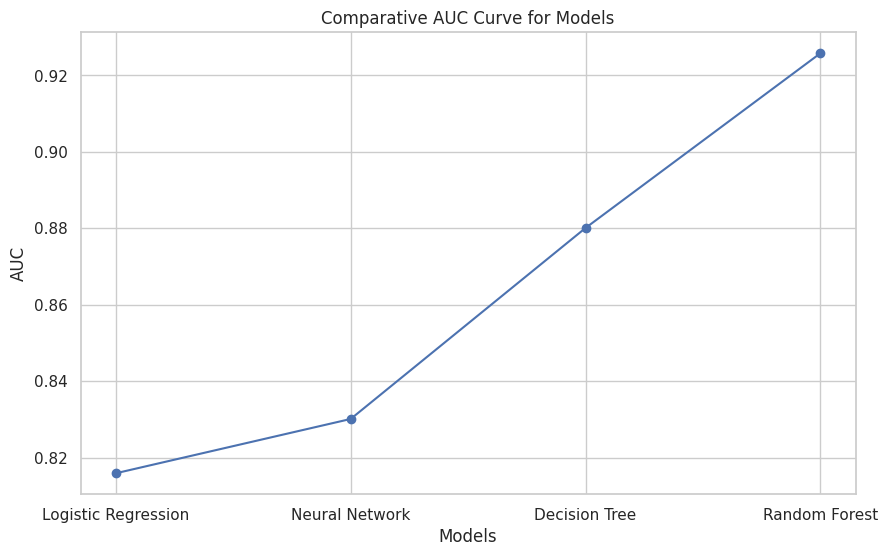

In [ ]:
import matplotlib.pyplot as plt

auc_values = [log_auc, ann_auc, dt_auc, rf_auc]
model_names = ["Logistic Regression", "Neural Network", "Decision Tree", "Random Forest"]

plt.figure(figsize=(10, 6))
plt.plot(model_names, auc_values, marker='o', linestyle='-')
plt.title('Comparative AUC Curve for Models')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

# Conditioning on predictive vs. interpretable models

Let us analyze the multiple models we have used, contrasting their predictive power or performance and interpretability. We will then discuss which model suits our use case best and why.

### **Interpretability:**

1. **Logistic Regression:**
    - **Interpretability:** Logistic regression is highly interpretable. The coefficients of the model provide clear insights into the impact of each feature on the output. It's easy to understand the relationship between input variables and the predicted probability of the target class.
2. **Decision Tree:**
    - **Interpretability:** Decision trees are also interpretable. We can visually interpret the decision-making process by examining the tree structure. Each node represents a decision based on a feature, making it easy to understand the rules used for classification.
    - **Graphical Interpretation:** In our project, we have presented a graph showing the top 10 attributes with the highest feature importance. This visual representation enhances the interpretability of the decision tree model, providing a clear understanding of which features play a crucial role in the decision-making process.
3. **Random Forest:**
    - **Interpretability:** Random forests are less interpretable compared to decision trees. While we can still get feature importance scores, the ensemble nature of random forests makes it harder to trace the decision-making process directly as compared to a single decision tree.
    - **Graphical Interpretation:** Similar to the decision tree, we’ve presented graphs for the Random Forest Classifier, showcasing the top 10 attributes with the highest feature importance. These visualizations help in understanding the collective impact of features across multiple trees in the ensemble, contributing to the overall model decision.
4. **Neural Networks:**
    - **Interpretability:** Neural networks are generally considered less interpretable. The hidden layers and complex interactions between neurons make it challenging to understand how each input feature contributes to the output. Techniques like feature visualization or attention mechanisms may offer some insights, but it's not as straightforward as logistic regression or decision trees.

### **Model Performance:**

1. **Logistic Regression:**
    - **Model Performance:** Logistic regression is a simple and linear model. It performs well when the relationship between features and the target is approximately linear. In our case, it achieved an accuracy of 82%, which is a decent performance.
2. **Decision Tree:**
    - **Model Performance:** Decision trees can capture non-linear relationships and interactions between features. It provided an accuracy of 88%, indicating an improvement over logistic regression. Decision trees are prone to overfitting, but pruning techniques can help mitigate this issue.
3. **Random Forest:**
    - **Model Performance:** Random forests, being an ensemble of decision trees, often provide improved performance by reducing overfitting. The accuracy of 93% suggests that it's effective in capturing complex patterns and generalizing well to new data.
4. **Neural Networks:**
    - **Model Performance:** Neural networks, particularly deep neural networks, can learn intricate patterns and representations from the data. Achieving an accuracy of 83%, which would increase with more data, indicates that the neural network is highly effective for our dataset. However, it comes with the cost of increased complexity.

### **Summarizing the selection of the most appropriate model as per our use-case:**

In the context of analyzing heart disease rates and its correlation with various attributes, prioritizing interpretability would a sound decision. Understanding the factors influencing heart disease is not only crucial for accurate predictions but also for making informed decisions in the healthcare domain. Here's why interpretability is particularly beneficial in this specific domain:

1. **Clinical Decision-Making:**
    - As a practitioner in the healthcare field, we would value models that provide clear insights into the variables influencing heart disease. Interpretability is key for making informed clinical decisions based on the identified risk factors. Logistic regression and decision trees/random forest, with their transparent decision rules, would allow us to easily communicate and validate the model's findings with fellow healthcare professionals.
2. **Feature Importance for Prevention:**
    - In the realm of heart disease prevention, knowing which attributes contribute significantly is paramount. The graphical representation of the top attributes with high feature importance in decision trees and random forests aids in focusing preventive measures on specific risk factors.
3. **Patient Communication:**
    - Explaining the risk factors to patients is an integral part of healthcare. Logistic regression's clear coefficient interpretation and decision tree visualization make it easier for me to convey complex medical information to patients in a comprehensible manner.
4. **Regulatory Compliance and Ethical Considerations:**
    - In the healthcare industry, compliance with regulations and ethical considerations is paramount. Transparent models not only facilitate adherence to regulatory standards but also contribute to ethical machine learning practices. Being able to explain the model's decisions is crucial for building trust among patients and ensuring ethical deployment of predictive analytics in healthcare.
5. **Collaboration with Multidisciplinary Teams:**
    - Heart disease analysis involves collaboration among diverse healthcare professionals, including doctors, nurses, and data scientists. Models like logistic regression and decision trees, with their interpretability, facilitate effective communication across disciplines.

In summary, in the context of heart disease analysis, where the goal is to uncover actionable insights for clinical decision-making and preventive strategies, prioritizing interpretability is a prudent choice. It not only aligns with the communication needs within the healthcare community but also ensures ethical and transparent use of predictive analytics for the benefit of patients and public health.

# Challenges, Limitations and Future Work

1. Limited Demographic Insights: Analysis can be further enhanced with more detailed demographic data to explore regional variations in health and lifestyle patterns affecting heart disease rates. Currently, the lack of data limits it.

2. Neural Network and Data Limitations: The accuracy for the neural nets can be further improved by acquiring a larger dataset, unlocking its full potential for more precise predictions. Currently, the lack of data limits it.

3. Integration of Additional Data Sources: Analysis can be enriched by incorporating external data linking cholesterol levels to dietary habits like fried potato consumption, providing a more comprehensive understanding of contributing factors. Currently, the lack of data limits it.

4. Addressing Potential Bias: Potential biases can be recognized and mitigated in the dataset, ensuring model predictions are more representative and applicable across diverse populations.

5. Temporal Analysis: A Temporal Analysis can be performed to understand how heart disease rates have evolved over time. This could involve examining trends, seasonal variations, or identifying any significant changes in risk factors. Currently, the lack of data limits it.

6. Health Intervention Strategies: There is a potential for recommending health intervention strategies based on the analysis. We may identify actionable recommendations for individuals or communities to reduce heart disease risk, considering cultural, economic, and lifestyle factors.

##Thank you !